### **Vehicle Insurance Claim Fraud Detection Using Support Vector Machine Algorithm**

Disusun Oleh:
*   Nurhadi Meilana (1519621040)

Dataset: https://www.kaggle.com/datasets/shivamb/vehicle-claim-fraud-detection/data

Referensi: https://www.kaggle.com/code/faridrizqis/claim-fraud-detection-xgb-lgbm-dt-rf

Latar Belakang: Perusahaan asuransi memiliki banyak masalah saat ini. Salah satu masalah besar dari perusahaan asuransi saat ini adalah mendeteksi kecurangan pemegang asuransi. Penipuan asuransi kendaraan melibatkan persekongkolan untuk membuat klaim palsu atau berlebihan yang melibatkan kerusakan properti atau cedera pribadi setelah kecelakaan. Beberapa contoh umum yang dilakukan adalah kecelakaan yang direncanakan di mana penipu dengan sengaja "mengatur" agar kecelakaan terjadi, adanya korban palsu di mana orang yang tidak berada di lokasi kecelakaan mengaku menderita cedera parah, dan membuat klaim cedera pribadi yang dilebih-lebihkan. Dalam penelitian ini, kami mencoba mengidentifikasi klaim asuransi palsu dengan bantuan metode pembelajaran mesin dan algoritma klasifikasi.

Tujuan: membuat model machine learning menggunakan algoritma Support Vector Machine untuk membantu perusahaan asuransi kendaraan dalam mendeteksi klaim asuransi palsu.



### **Import Library**

In [ ]:
# Mengimpor pustaka NumPy dan Pandas untuk manipulasi data
import numpy as np
import pandas as pd

# Mengimpor modul pyplot dari Matplotlib untuk membuat visualisasi data
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline

# Mengimpor pustaka Seaborn untuk visualisasi yang lebih menarik
import seaborn as sns

# Algorithms
from sklearn import linear_model
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

# Mengimpor modul os dan warnings untuk fungsionalitas sistem operasi dan pengaturan peringatan
import os
import warnings

# Menonaktifkan tampilan peringatan yang dihasilkan oleh Python
warnings.filterwarnings('ignore')

### **Read Dataset**

In [ ]:
# Membaca dataset
df = pd.read_csv('/content/fraud_oracle.csv')
df

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,Nov,4,Friday,Toyota,Urban,Tuesday,Nov,5,Male,Married,...,6 years,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision
15416,Nov,5,Thursday,Pontiac,Urban,Friday,Dec,1,Male,Married,...,6 years,31 to 35,No,No,External,more than 5,no change,3 to 4,1996,Liability
15417,Nov,5,Thursday,Toyota,Rural,Friday,Dec,1,Male,Single,...,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision
15418,Dec,1,Monday,Toyota,Urban,Thursday,Dec,2,Female,Married,...,2 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,All Perils


### **Data Understanding**

*   Month: Bulan terjadinya kecelakaan
*   WeekOfMonth: Minggu ke berapa dari bulan terjadinya kecelakaan
*   DayOfWeek: Hari terjadinya kecelakaan
*   Make: Merk kendaraan
*   AccidentArea: Area kecelakaan
*   DayOfWeekClaimed: Hari saat klaim asuransi diajukan
*   MonthClaimed: Bulan saat klaim asuransi diajukan
*   WeekOfMonthClaimed: Minggu ke berapa dari bulan saat klaim asuransi diajukan
*   Sex: Jenis kelamin orang yang mengajukan klaim
*   MaritalStatus: Status pernikahan orang yang mengajukan klaim
*   Age: Usia orang yang mengajukan klaim
*   Fault: Siapa yang bertanggung jawab atas kecelakaan
*   PolicyType: Jenis asuransi dan kategori kendaraan
*   VehicleCategory: Kategori kendaraan
*   VehiclePrice: Harga kendaraan
*   FraudFound_P: Menunjukkan apakah suatu klaim bersifat penipuan, 1 = terjadi penipuan klaim asuransi, 0 = tidak terjadi penipuan klaim asuransi
*   PolicyNumber: Nomor polis
*   RepNumber: Nomor yang berkaitan dengan representatif atau agen asuransi tertentu
*   Deductible: Jumlah uang yang harus dibayar oleh pemegang polis sebelum asuransi mengambil bagian dalam pembayaran klaim
*   DriverRating: Rating pengemudi dalam suatu polis asuransi kendaraan
*   Days_Policy_Accident: Jumlah hari antara saat polis dibeli dan kecelakaan terjadi
*   Days_Policy_Claim: Jumlah hari antara saat polis dibeli dan saat klaim diajukan
*   PastNumberOfClaims: Jumlah klaim yang dilaporkan sebelumnya
*   AgeOfVehicle: Usia kendaraan saat kecelakaan
*   AgeOfPolicyHolder: kategori usia pemilik asuransi
*   PoliceReportFiled: Menunjukkan apakah laporan polisi telah dibuat untuk kecelakaan tersebut
*   WitnessPresent: Menunjukkan apakah ada saksi yang hadir
*   AgentType: Jenis agen yang menangani klaim
*   NumberOfSupplements: Jumlah tambahan atau suplemen dalam klaim asuransi
*   AddressChange_Claim: Waktu sejak klaim diajukan hingga saat orang tersebut pindah atau mengubah alamat
*   NumberOfCars: Jumlah kendaraan yang terlibat dalam kecelakaan
*   Year:Tahun terjadinya kecelakaan
*   BasePolicy: Jenis perlindungan asuransi

In [ ]:
# Mengetahui informasi ringkas dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

Pada dataset tersebut terdapat 15420 baris dan 33 kolom. Dataset tersebut memiliki 9 tipe data int dan 24 tipe data object.

In [ ]:
# Mengetahui ringkasan statistik deskriptif dari dataset
df.describe()

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year
count,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000
mean,2.788586,2.693969,39.855707,0.059857,7710.500000,8.483268,407.704280,2.487808,1994.866472
std,1.287585,1.259115,13.492377,0.237230,4451.514911,4.599948,43.950998,1.119453,0.803313
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,300.000000,1.000000,1994.000000
25%,2.000000,2.000000,31.000000,0.000000,3855.750000,5.000000,400.000000,1.000000,1994.000000
50%,3.000000,3.000000,38.000000,0.000000,7710.500000,8.000000,400.000000,2.000000,1995.000000
75%,4.000000,4.000000,48.000000,0.000000,11565.250000,12.000000,400.000000,3.000000,1996.000000
max,5.000000,5.000000,80.000000,1.000000,15420.000000,16.000000,700.000000,4.000000,1996.000000


In [ ]:
# Mengetahui ringkasan statistik dari kolom-kolom bertipe objek dalam dataset
df.describe(include='object')

,Month,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,Sex,MaritalStatus,Fault,PolicyType,...,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,BasePolicy
count,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420,...,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420
unique,12,7,19,2,8,13,2,4,2,9,...,4,8,9,2,2,2,4,5,5,3
top,Jan,Monday,Pontiac,Urban,Monday,Jan,Male,Married,Policy Holder,Sedan - Collision,...,2 to 4,7 years,31 to 35,No,No,External,none,no change,1 vehicle,Collision
freq,1411,2616,3837,13822,3757,1446,13000,10625,11230,5584,...,5485,5807,5593,14992,15333,15179,7047,14324,14316,5962


In [ ]:
# Menghitung jumlah nilai null (kosong) dari setiap kolom pada dataset
df.isnull().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

Pada dataset tersebut tidak memiliki nilai null, sehingga tidak perlu dilakukan handling missing value.

In [ ]:
# Mengetahui unique value dari setiap variabel
df.nunique()

Month                      12
WeekOfMonth                 5
DayOfWeek                   7
Make                       19
AccidentArea                2
DayOfWeekClaimed            8
MonthClaimed               13
WeekOfMonthClaimed          5
Sex                         2
MaritalStatus               4
Age                        66
Fault                       2
PolicyType                  9
VehicleCategory             3
VehiclePrice                6
FraudFound_P                2
PolicyNumber            15420
RepNumber                  16
Deductible                  4
DriverRating                4
Days_Policy_Accident        5
Days_Policy_Claim           4
PastNumberOfClaims          4
AgeOfVehicle                8
AgeOfPolicyHolder           9
PoliceReportFiled           2
WitnessPresent              2
AgentType                   2
NumberOfSuppliments         4
AddressChange_Claim         5
NumberOfCars                5
Year                        3
BasePolicy                  3
dtype: int

Berdasarkan data unique tersebut, dapat diketahui bahwa:
*   Variabel DayOfWeekClaimed dan MonthClaimed terdapat kesalahan karena untuk hari harusnya ada 7 dan bulan harusnya ada 12.
*   Variabel PolicyNumber kemungkinan seperti index, hanya urutan nomor saja dari 1 sampai 15420.



In [ ]:
# Melakukan iterasi pada setiap kolom dalam DataFrame
for column in df:
    # Memeriksa jika kolom adalah 'PolicyNumber', karena hanya berisi urutan angka dari 1 - 15420 jadi tidak ditampilkan
    if column == 'PolicyNumber':
        # Jika kolom adalah 'PolicyNumber', lanjutkan ke kolom berikutnya
        pass
    else:
        # Jika kolom bukan 'PolicyNumber', cetak nama kolom
        print(column)
        # Cetak nilai-nilai unik yang diurutkan dari kolom yang sedang diperiksa
        print(sorted(df[column].unique()),"\n")

Month
['Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep'] 

WeekOfMonth
[1, 2, 3, 4, 5] 

DayOfWeek
['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'] 

Make
['Accura', 'BMW', 'Chevrolet', 'Dodge', 'Ferrari', 'Ford', 'Honda', 'Jaguar', 'Lexus', 'Mazda', 'Mecedes', 'Mercury', 'Nisson', 'Pontiac', 'Porche', 'Saab', 'Saturn', 'Toyota', 'VW'] 

AccidentArea
['Rural', 'Urban'] 

DayOfWeekClaimed
['0', 'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'] 

MonthClaimed
['0', 'Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep'] 

WeekOfMonthClaimed
[1, 2, 3, 4, 5] 

Sex
['Female', 'Male'] 

MaritalStatus
['Divorced', 'Married', 'Single', 'Widow'] 

Age
[0, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 7

*   Ternyata benar, pada variabel DayOfWeekClaimed dan MonthClaimed terdapat nilai 0.
*   Pada variabel Age juga terdapat nilai 0.
*   Variabel PolicyType merupakan gabungan antara jenis asuransi dan kategori kendaraan.





In [ ]:
# Mengetahui apakah terdapat data duplikat dalam dataset tersebut
df.duplicated().sum()

0

### **Data Cleaning**

In [ ]:
# Mengetahui data variabel DayOfWeekClaimed yang bernilai 0
df[df['DayOfWeekClaimed']=='0']

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
1516,Jul,2,Monday,Honda,Rural,0,0,1,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,All Perils


In [ ]:
# Mengetahui data variabel MonthClaimed yang bernilai 0
df[df['MonthClaimed']=='0']

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
1516,Jul,2,Monday,Honda,Rural,0,0,1,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,All Perils


Karena data DayOfWeekClaimed dan MonthClaimed yang bernilai 0 berada pada baris yang sama, kami memutuskan untuk mendrop data tersebut.

In [ ]:
# Mendrop data DayOfWeekClaimed dan MonthClaimed yang bernilai 0
df = df[~(df['DayOfWeekClaimed']=='0')]
df[df['DayOfWeekClaimed']=='0']

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy


In [ ]:
# Melakukan reset index
df.reset_index(drop=True, inplace=True)
len(df)

15419

In [ ]:
# Mengetahui data Age yang 0
df[df['Age']==0]

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
7,Nov,1,Friday,Honda,Urban,Tuesday,Mar,4,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,Collision
13,Jan,5,Friday,Honda,Rural,Wednesday,Feb,1,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,Collision
28,Jul,1,Saturday,Honda,Urban,Tuesday,Sep,4,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,All Perils
31,Mar,1,Sunday,Honda,Urban,Tuesday,Mar,2,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,Collision
58,May,1,Monday,Honda,Rural,Wednesday,May,4,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,Liability
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15242,May,2,Tuesday,Honda,Urban,Monday,May,3,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1996,Liability
15261,Mar,3,Monday,Honda,Urban,Thursday,Mar,3,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1996,Liability
15273,Apr,3,Monday,Honda,Urban,Tuesday,May,1,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1996,Collision
15378,Jan,2,Tuesday,Honda,Urban,Thursday,Jan,2,Male,Single,...,new,16 to 17,No,No,External,none,1 year,1 vehicle,1996,All Perils


Berdasarkan data tersebut, variabel Age yang bernilai 0 berjumlah 319 baris. Untuk mengatasi hal tersebut, kami mencoba melihat apakah ada hubungan antara variabel Age dan variabel AgeOfPolicyHolder.

In [ ]:
# Inisialisasi list kosong untuk menyimpan grup-grup yang dihasilkan
groupings = []

# Melakukan iterasi pada setiap nilai dalam kolom 'AgeOfPolicyHolder'
for holder in df['AgeOfPolicyHolder']:
    # Jika terdapat string 'to' dalam nilai kolom 'AgeOfPolicyHolder'
    if 'to' in holder :
        # Membagi string tersebut menjadi potongan-potongan kata
        temp = holder.split()
        # Membuat list dengan dua angka yang diambil dari potongan kata
        nr=[int(temp[0]),int(temp[2])]
        # Menambahkan list angka ke dalam list 'groupings'
        groupings.append(nr)
    # Jika tidak terdapat string 'to' dalam nilai kolom 'AgeOfPolicyHolder'
    else :
        # Membagi string tersebut menjadi potongan-potongan kata
        temp = holder.split()
        # Jika tidak terdapat rentang, memberikan nilai 129 sebagai batas atas
        nr = [int(temp[1]),129]
        # Menambahkan list angka ke dalam list 'groupings'
        groupings.append(nr)

# Inisialisasi list untuk indeks usia
age_idx = []
# Inisialisasi list untuk indeks baris yang tidak sesuai dengan grup usia
rw_idx = []

# Melakukan iterasi sepanjang data dalam kolom 'Age'
for r in range(len(df['Age'])):
    # Memeriksa apakah nilai 'Age' berada di dalam rentang grup usia yang sesuai
    if (df.loc[r,'Age']>= groupings[r][0]) & (df.loc[r,'Age']<= groupings[r][1]):
        # Jika dalam rentang, tambahkan 0 ke dalam 'age_idx'
        age_idx.append(0)
    else:
        # Jika tidak dalam rentang, tambahkan 1 ke dalam 'age_idx'
        age_idx.append(1)
        # Jika tidak sesuai, tambahkan indeks baris ke dalam 'rw_idx'
        rw_idx.append(r)

df.loc[list(rw_idx),('Age','AgeOfPolicyHolder')]

,Age,AgeOfPolicyHolder
0,21,26 to 30
4,27,31 to 35
5,20,21 to 25
7,0,16 to 17
8,30,31 to 35
...,...,...
15410,42,36 to 40
15411,28,31 to 35
15415,30,31 to 35
15416,24,26 to 30


Terdapat 7241 baris dari 15419, yang usianya tidak sesuai dengan rentang usia pada kolom 'AgeOfPolicyHolder'. Jumlah data yang berbeda ini cukup banyak dan tidak mungkin merupakan kesalahan ketik. Asumsi yang cukup masuk akal adalah bahwa orang yang mengemudi pada saat kecelakaan bukanlah pemegang polis, melainkan orang lain.

Tetapi karena banyak juga data usia yang sesuai dengan rentang usia pada kolom 'AgeOfPolicyHolder', kami putuskan untuk mengganti nilai 0 pada kolom 'Age' dengan nilai rata-rata rentang usia ketika 'Age' = 0.

In [ ]:
# Menampilkan nilai unik dari kolom 'AgeOfPolicyHolder' untuk data di mana 'Age' = 0
df[df['Age']==0]['AgeOfPolicyHolder'].unique()

array(['16 to 17'], dtype=object)

Berdasarkan hasil tersebut, dapat disimpulkan bahwa untuk semua data Age yang bernilai 0, rentang usianya berada di ['16 to 17']. Oleh karena itu untuk data Age yang bernilai 0 akan diganti dengan nilai rata-rata dari rentang usia 16 sampai 17 tahun yaitu 16,5 tahun.

In [ ]:
# Mengganti nilai 0 dengan 16.5
df['Age'] = df['Age'].replace({0: 16.5})

# Mengubah tipe data kolom 'Age' menjadi float
df['Age'] = df['Age'].astype(float)

# Memeriksa apakah nilai 'Age' yang bernilai 0 sudah diubah
df[df['Age'] == 0]

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy


### **Exploratory Data Analysis**

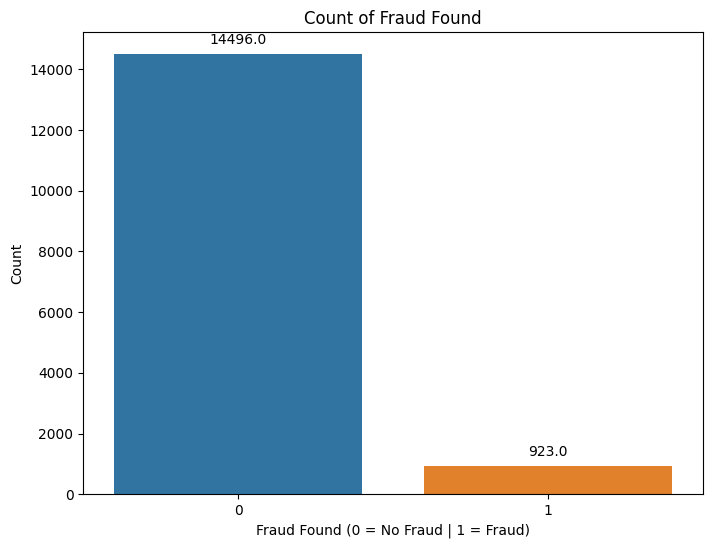

In [ ]:
# Membuat countplot dengan seaborn
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='FraudFound_P', data=df)

# Menambahkan nilai di atas setiap bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Menambahkan judul pada bar chart
plt.title('Count of Fraud Found')
# Memberi label sumbu x
plt.xlabel('Fraud Found (0 = No Fraud | 1 = Fraud)')
# Memberi label sumbu y
plt.ylabel('Count')

# Menampilkan bar chart
plt.show()

Berdasarkan bar chart tersebut dapat dilihat bahwa data Fraud dan No Fraud tidak seimbang, yang berarti kita tidak memiliki cukup sampel dari setiap kelas dan akan mengalami masalah dalam train model. Oleh karena itu, dataset harus diseimbangkan sebelum melakukan train model.

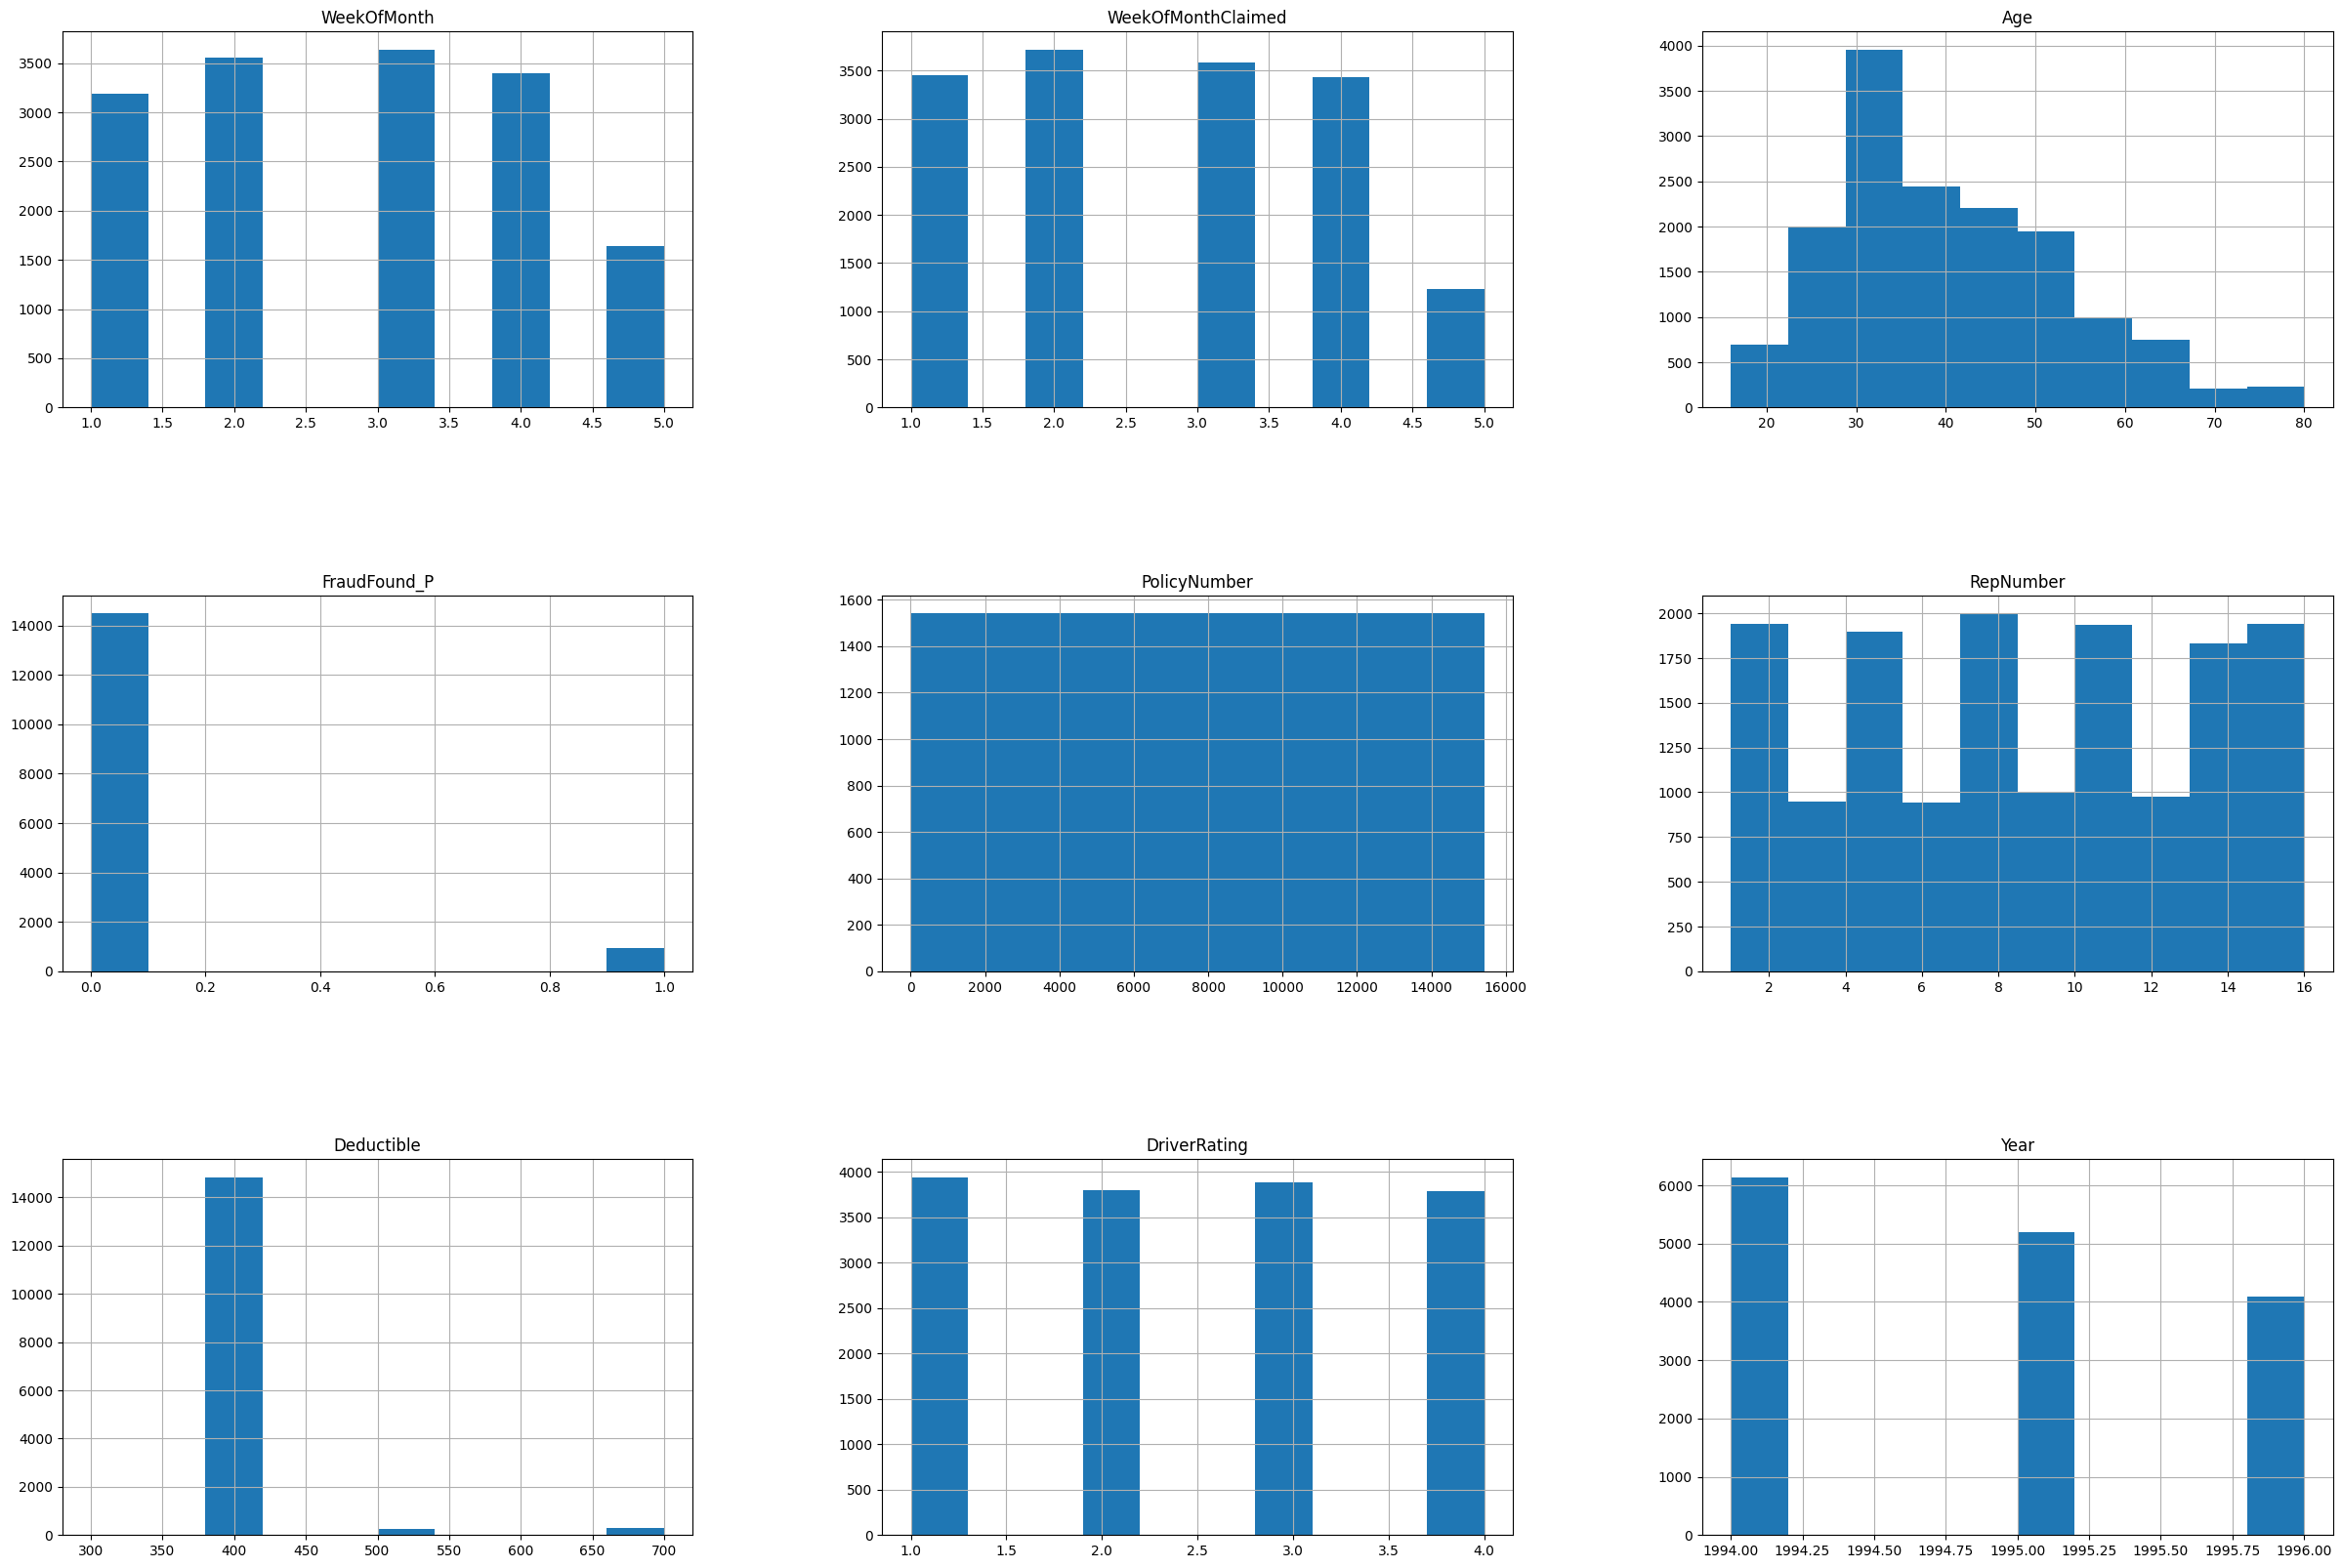

In [ ]:
# Memuat histogram untuk setiap kolom numerik
df.hist(figsize=(30,20))

# Menyesuaikan jarak vertikal antar subplot
plt.subplots_adjust(hspace=0.5)

# Menampilkan plot histogram
plt.show()

Dari histogram tersebut dapat diketahui bahwa:
*   Sebagian besar nilai usia berada di sekitar 30 sampai 40 tahun
*   Sebagian besar kecelakaan terjadi di pertengahan bulan
*   Nilai dari setiap kelas DriverRating hampir sama

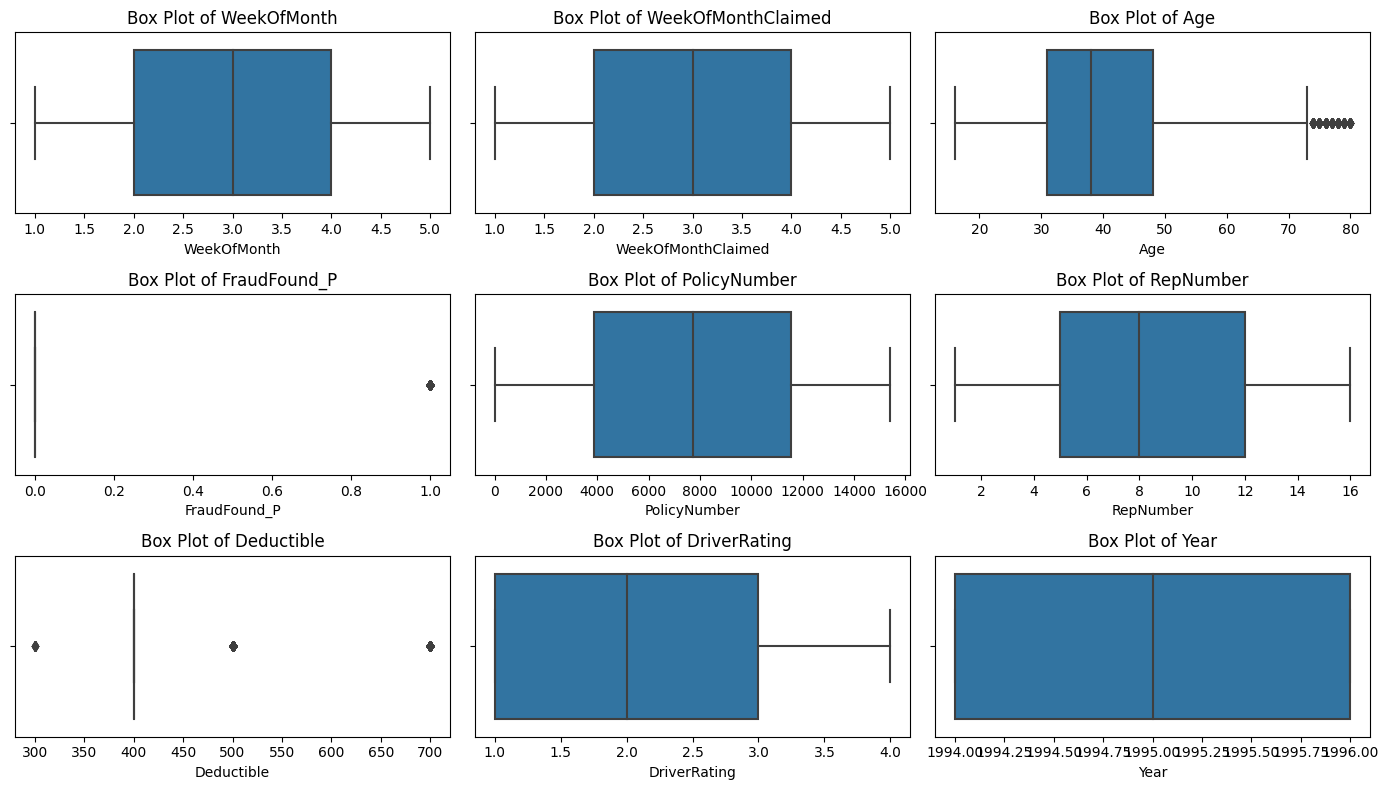

In [ ]:
# Daftar kolom numerik yang akan diplot
columns_to_plot = ['WeekOfMonth', 'WeekOfMonthClaimed', 'Age', 'FraudFound_P', 'PolicyNumber', 'RepNumber', 'Deductible', 'DriverRating', 'Year']

# Membuat gambar dengan ukuran tertentu
plt.figure(figsize=(14, 8))

# Iterasi melalui setiap kolom yang akan diplot
for i, column in enumerate(columns_to_plot, 1):
    # Membuat subplot
    plt.subplot(3, 3, i)

    # Membuat box plot menggunakan seaborn untuk kolom tertentu
    sns.boxplot(data=df, x=column)

    # Menetapkan judul pada subplot
    plt.title(f'Box Plot of {column}')

    # Menetapkan label pada sumbu x subplot
    plt.xlabel(column)

# Menyesuaikan layout subplot
plt.tight_layout()

# Menampilkan plot
plt.show()

Pada kolom Age terdapat nilai pencilan/outlier

Kolom FraudFound_P merupakan nilai boolean/biner, bukan outlier

Kolom Deductible hanya terdapat nilai 300, 400, 500 dan 700, bukan outlier



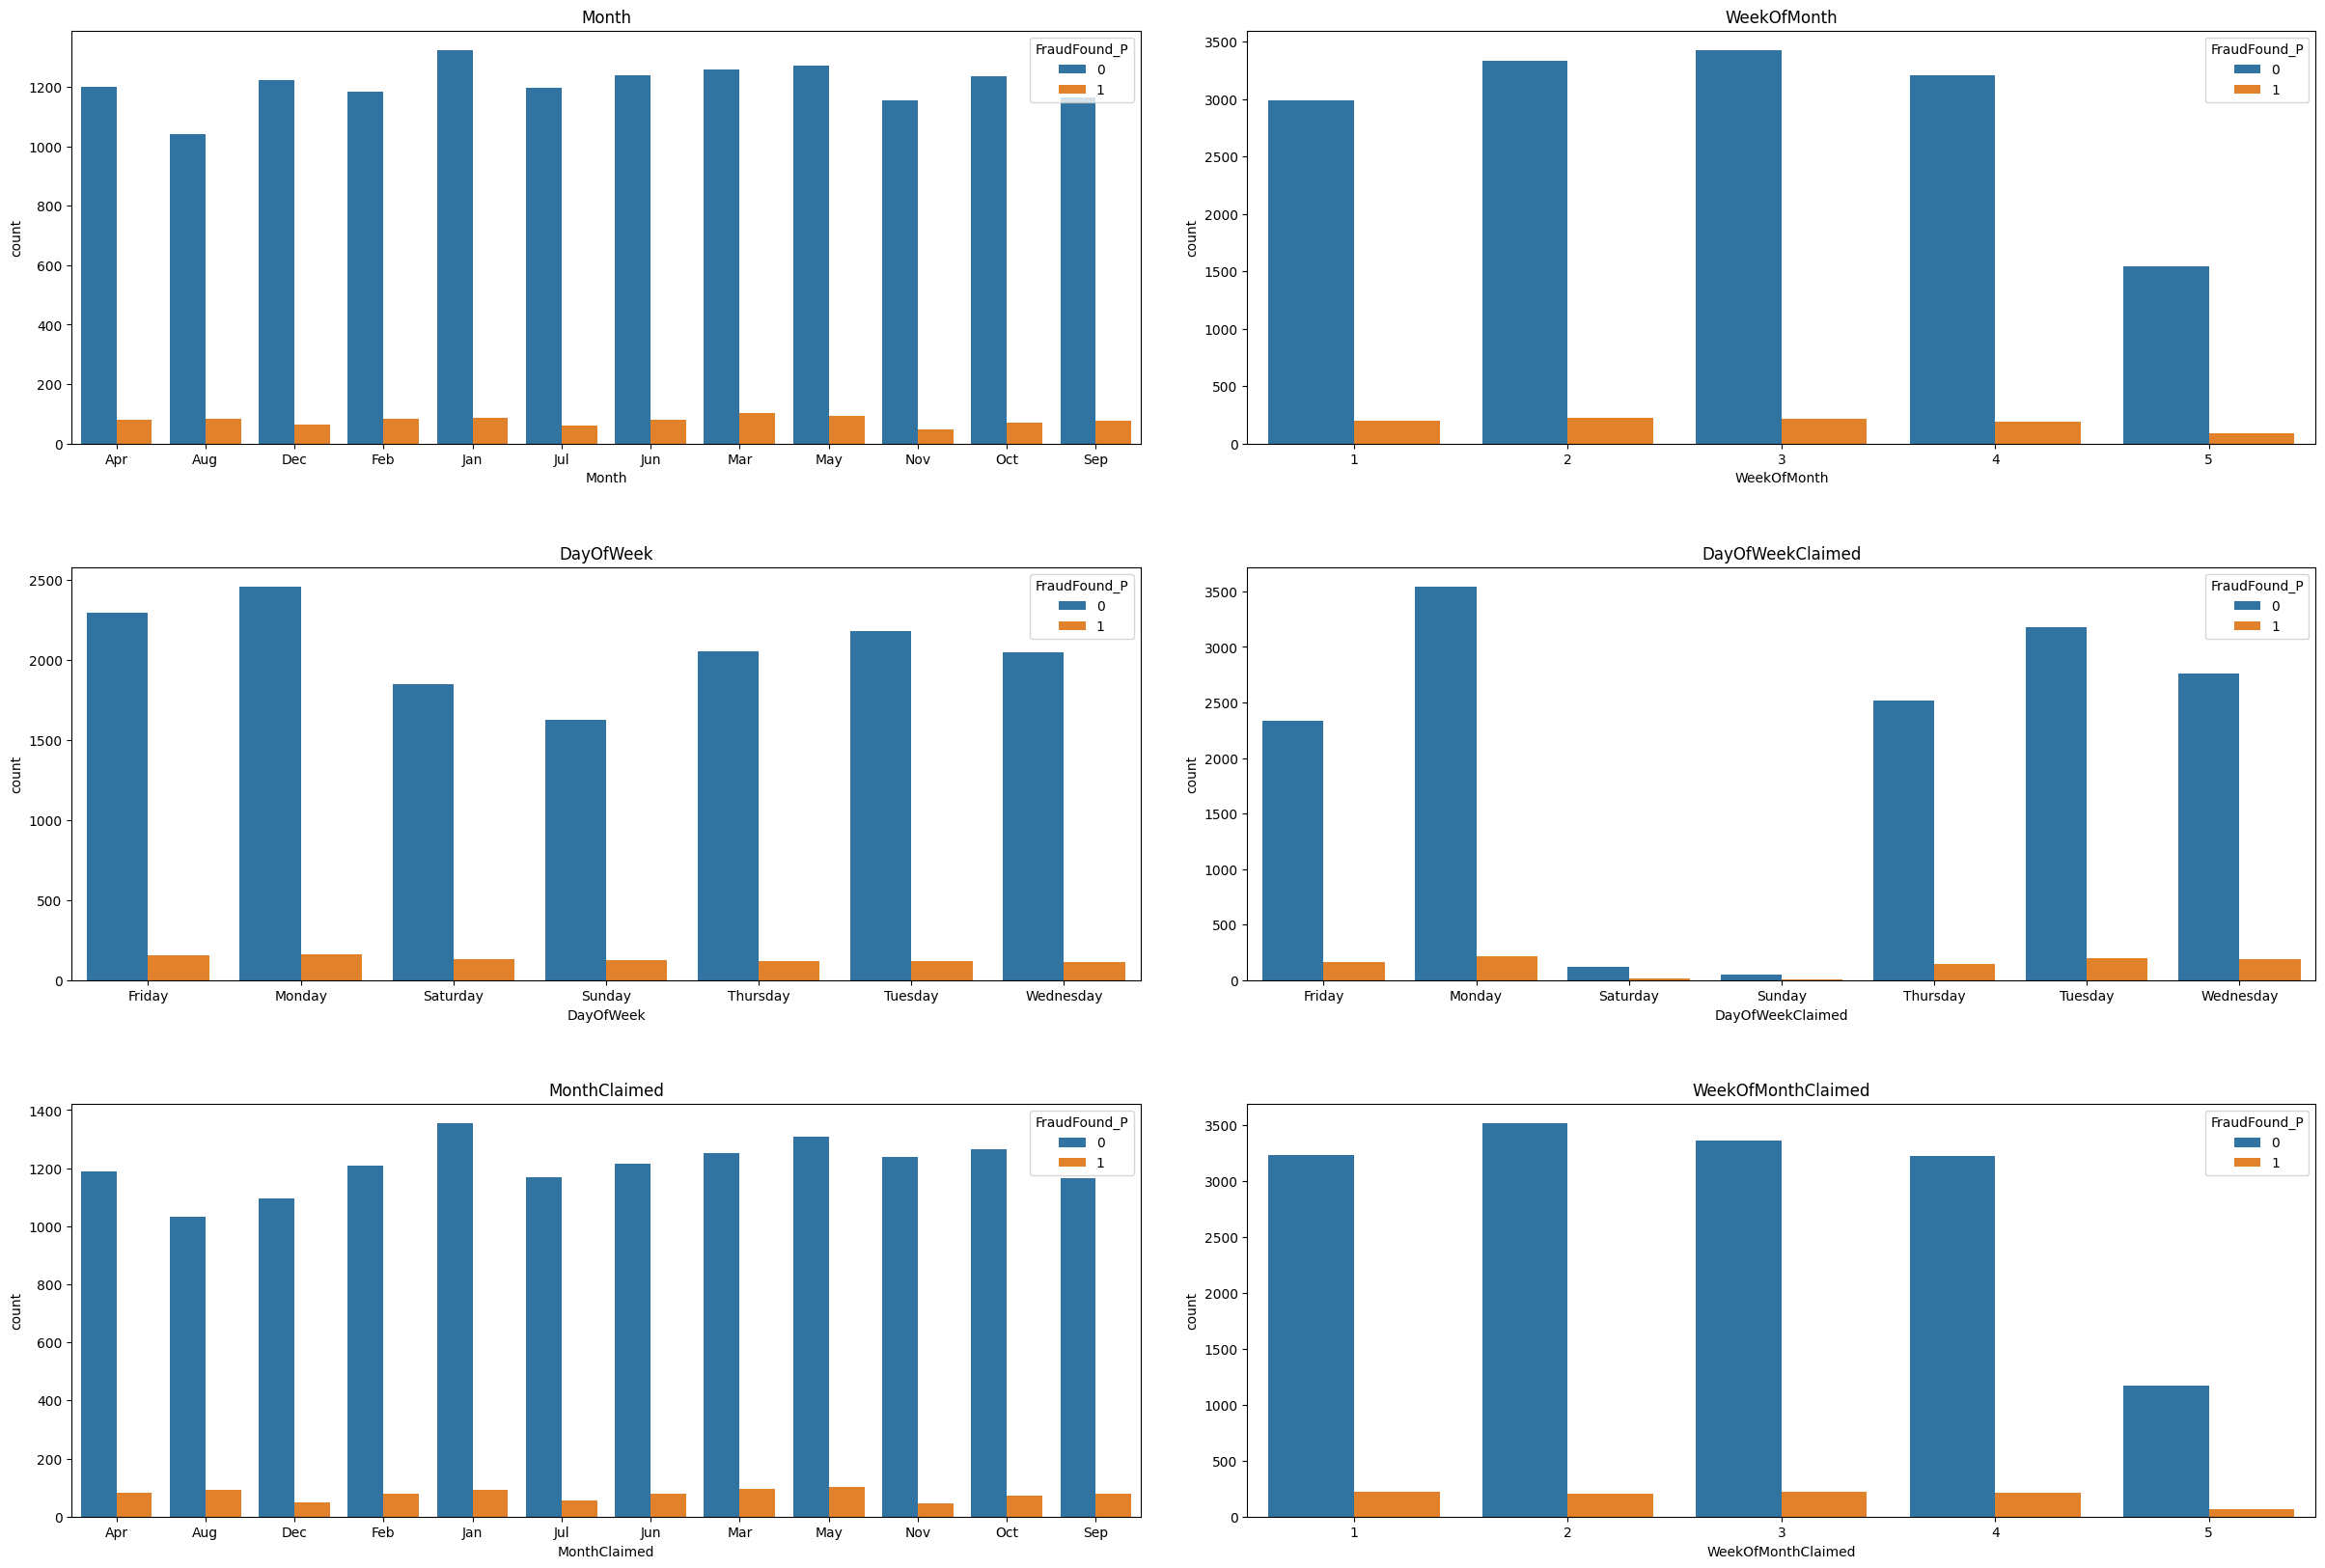

In [ ]:
def plotbar(columns, target):
    # Membuat gambar subplot dengan ukuran tertentu
    fig, ax = plt.subplots(3, 2, figsize=(30, 20))

    # Iterasi melalui setiap kolom yang diberikan
    for i, column in enumerate(columns):
        # Mendapatkan urutan nilai unik dalam kolom tertentu dan mengurutkannya
        order = sorted(df[column].unique())

        # Membuat countplot menggunakan seaborn untuk kolom tertentu dengan urutan nilai yang telah diurutkan
        sns.countplot(data=df, x=column, hue=target, order=order, ax=ax[i // 2][i % 2])

        # Menetapkan judul subplot sesuai dengan nama kolom yang sedang diproses
        ax[i // 2][i % 2].set_title(column)

    # Menyesuaikan ruang antara subplot
    plt.subplots_adjust(hspace=0.3, wspace=0.1)

# Memanggil fungsi plotbar dengan kolom yang akan diplot dan kolom target
plotbar(["Month", "WeekOfMonth", "DayOfWeek", "DayOfWeekClaimed", "MonthClaimed", "WeekOfMonthClaimed"], df['FraudFound_P'])

Berdasarkan bar chart tersebut, dapat diketahui bahwa:
*   Kecelakaan paling banyak terjadi pada bulan Januari dan paling sedikit terjadi pada bulan Agustus.
*   Pada minggu ke-3 jumlah kecelakaannya tertinggi, sementara minggu ke-5 jumlah kecelakaannya terendah.
*   Hari Senin menjadi hari dengan kecelakaan terbanyak, sementara Minggu menjadi hari dengan kecelakaan terendah.
*   Klaim asuransi paling banyak diajukan pada bulan Januari, sedangkan jumlah klaim terendah terjadi di bulan Agustus.
*   Minggu ke-2 memiliki jumlah klaim tertinggi, sementara minggu ke-5 memiliki jumlah klaim terendah.
*   Hari Senin menjadi hari pengajuan klaim asuransi tertinggi, sedangkan Sabtu dan Minggu menjadi hari dengan jumlah klaim terendah.
*   Untuk klaim asuransi palsu berdasarkan bulan, minggu, dan hari kecelakaan, jumlahnya hampir sama, hanya pada bulan November dan minggu ke-5 jumlahnya lebih sedikit dibanding yang lain.
*   Untuk klaim asuransi palsu berdasarkan bulan, minggu, dan hari klaim asuransi, jumlahnya hampir sama, hanya pada bulan November, Desember, minggu ke-5, dan hari Sabtu & Minggu jumlahnya lebih sedikit dibanding yang lain.










Text(0.5, 1.0, 'Age')

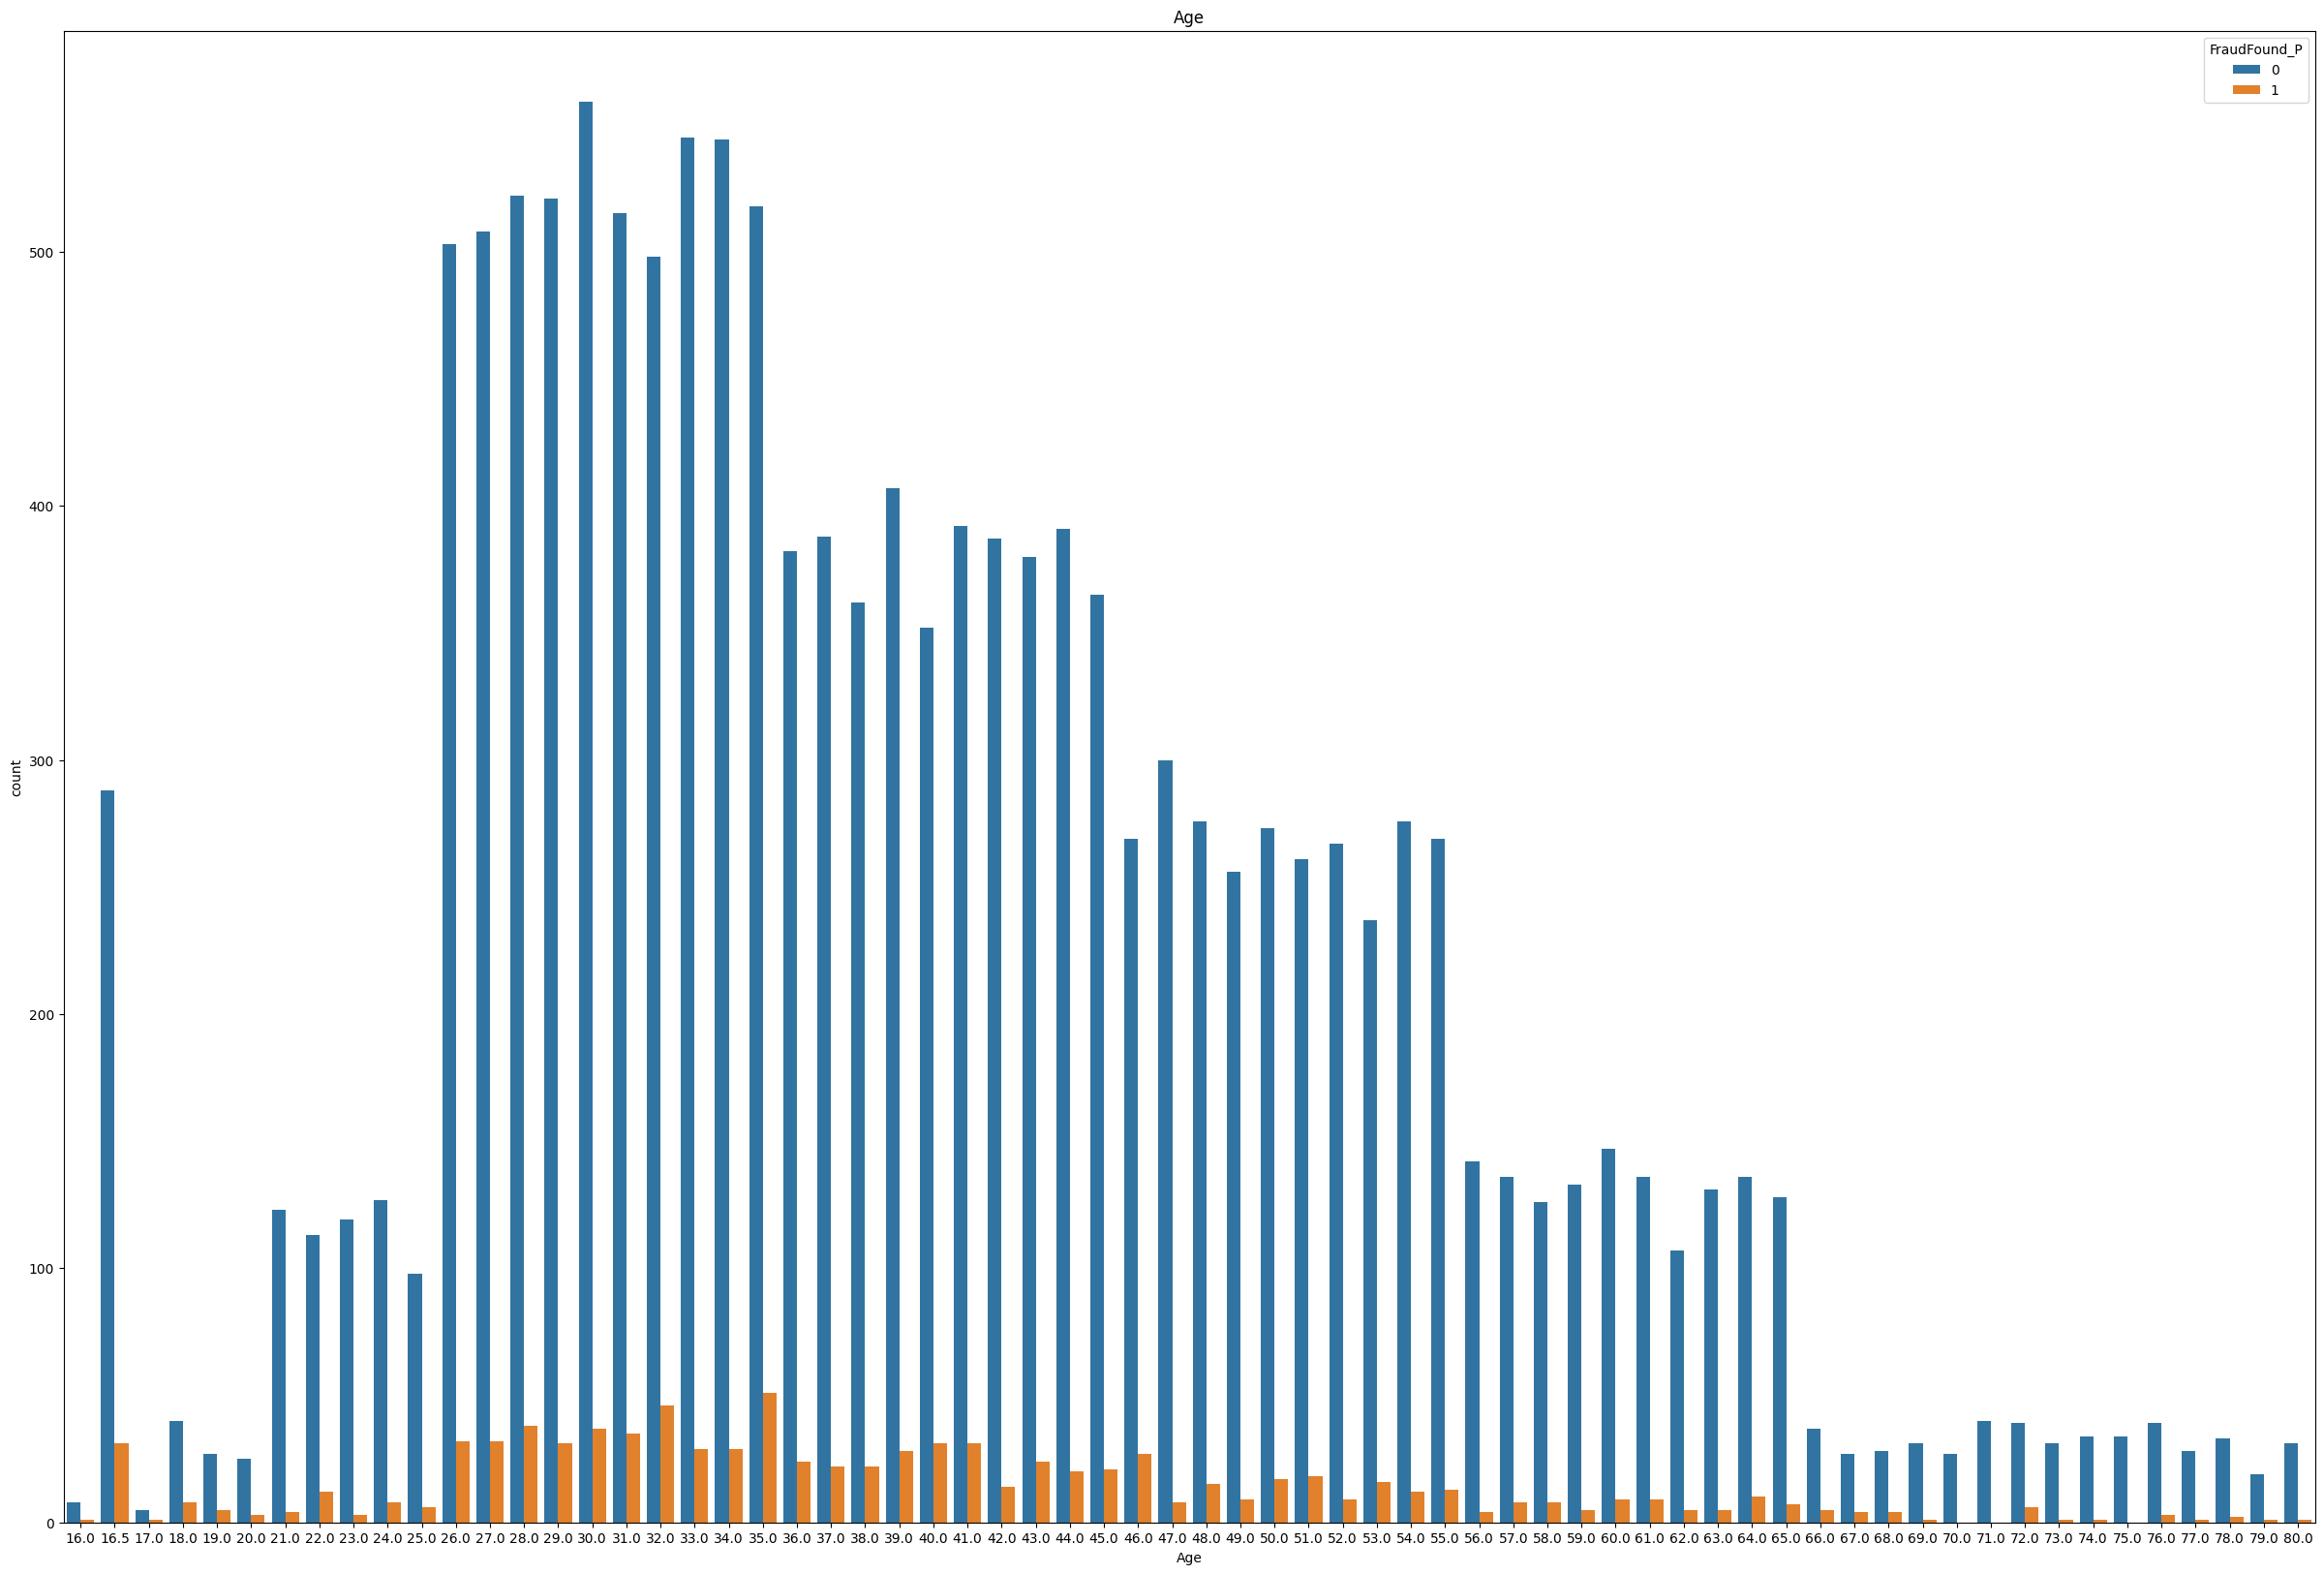

In [ ]:
# Membuat gambar dengan ukuran tertentu
plt.figure(figsize=(30,20))

# Mendapatkan urutan nilai unik dalam kolom "Age" dan mengurutkannya
order = sorted(df["Age"].unique())

# Membuat countplot menggunakan seaborn untuk kolom "Age" dengan urutan nilai yang telah diurutkan
sns.countplot(data=df, x="Age", hue=df["FraudFound_P"], order=order)

# Menetapkan judul plot
plt.title("Age")

Sebagian besar kecelakaan terjadi pada kelompok usia sekitar 30 tahun. Orang yang berusia 35 tahun merupakan kelompok usia terbanyak yang melakukan klaim asuransi palsu.

Text(0.5, 1.0, 'Make')

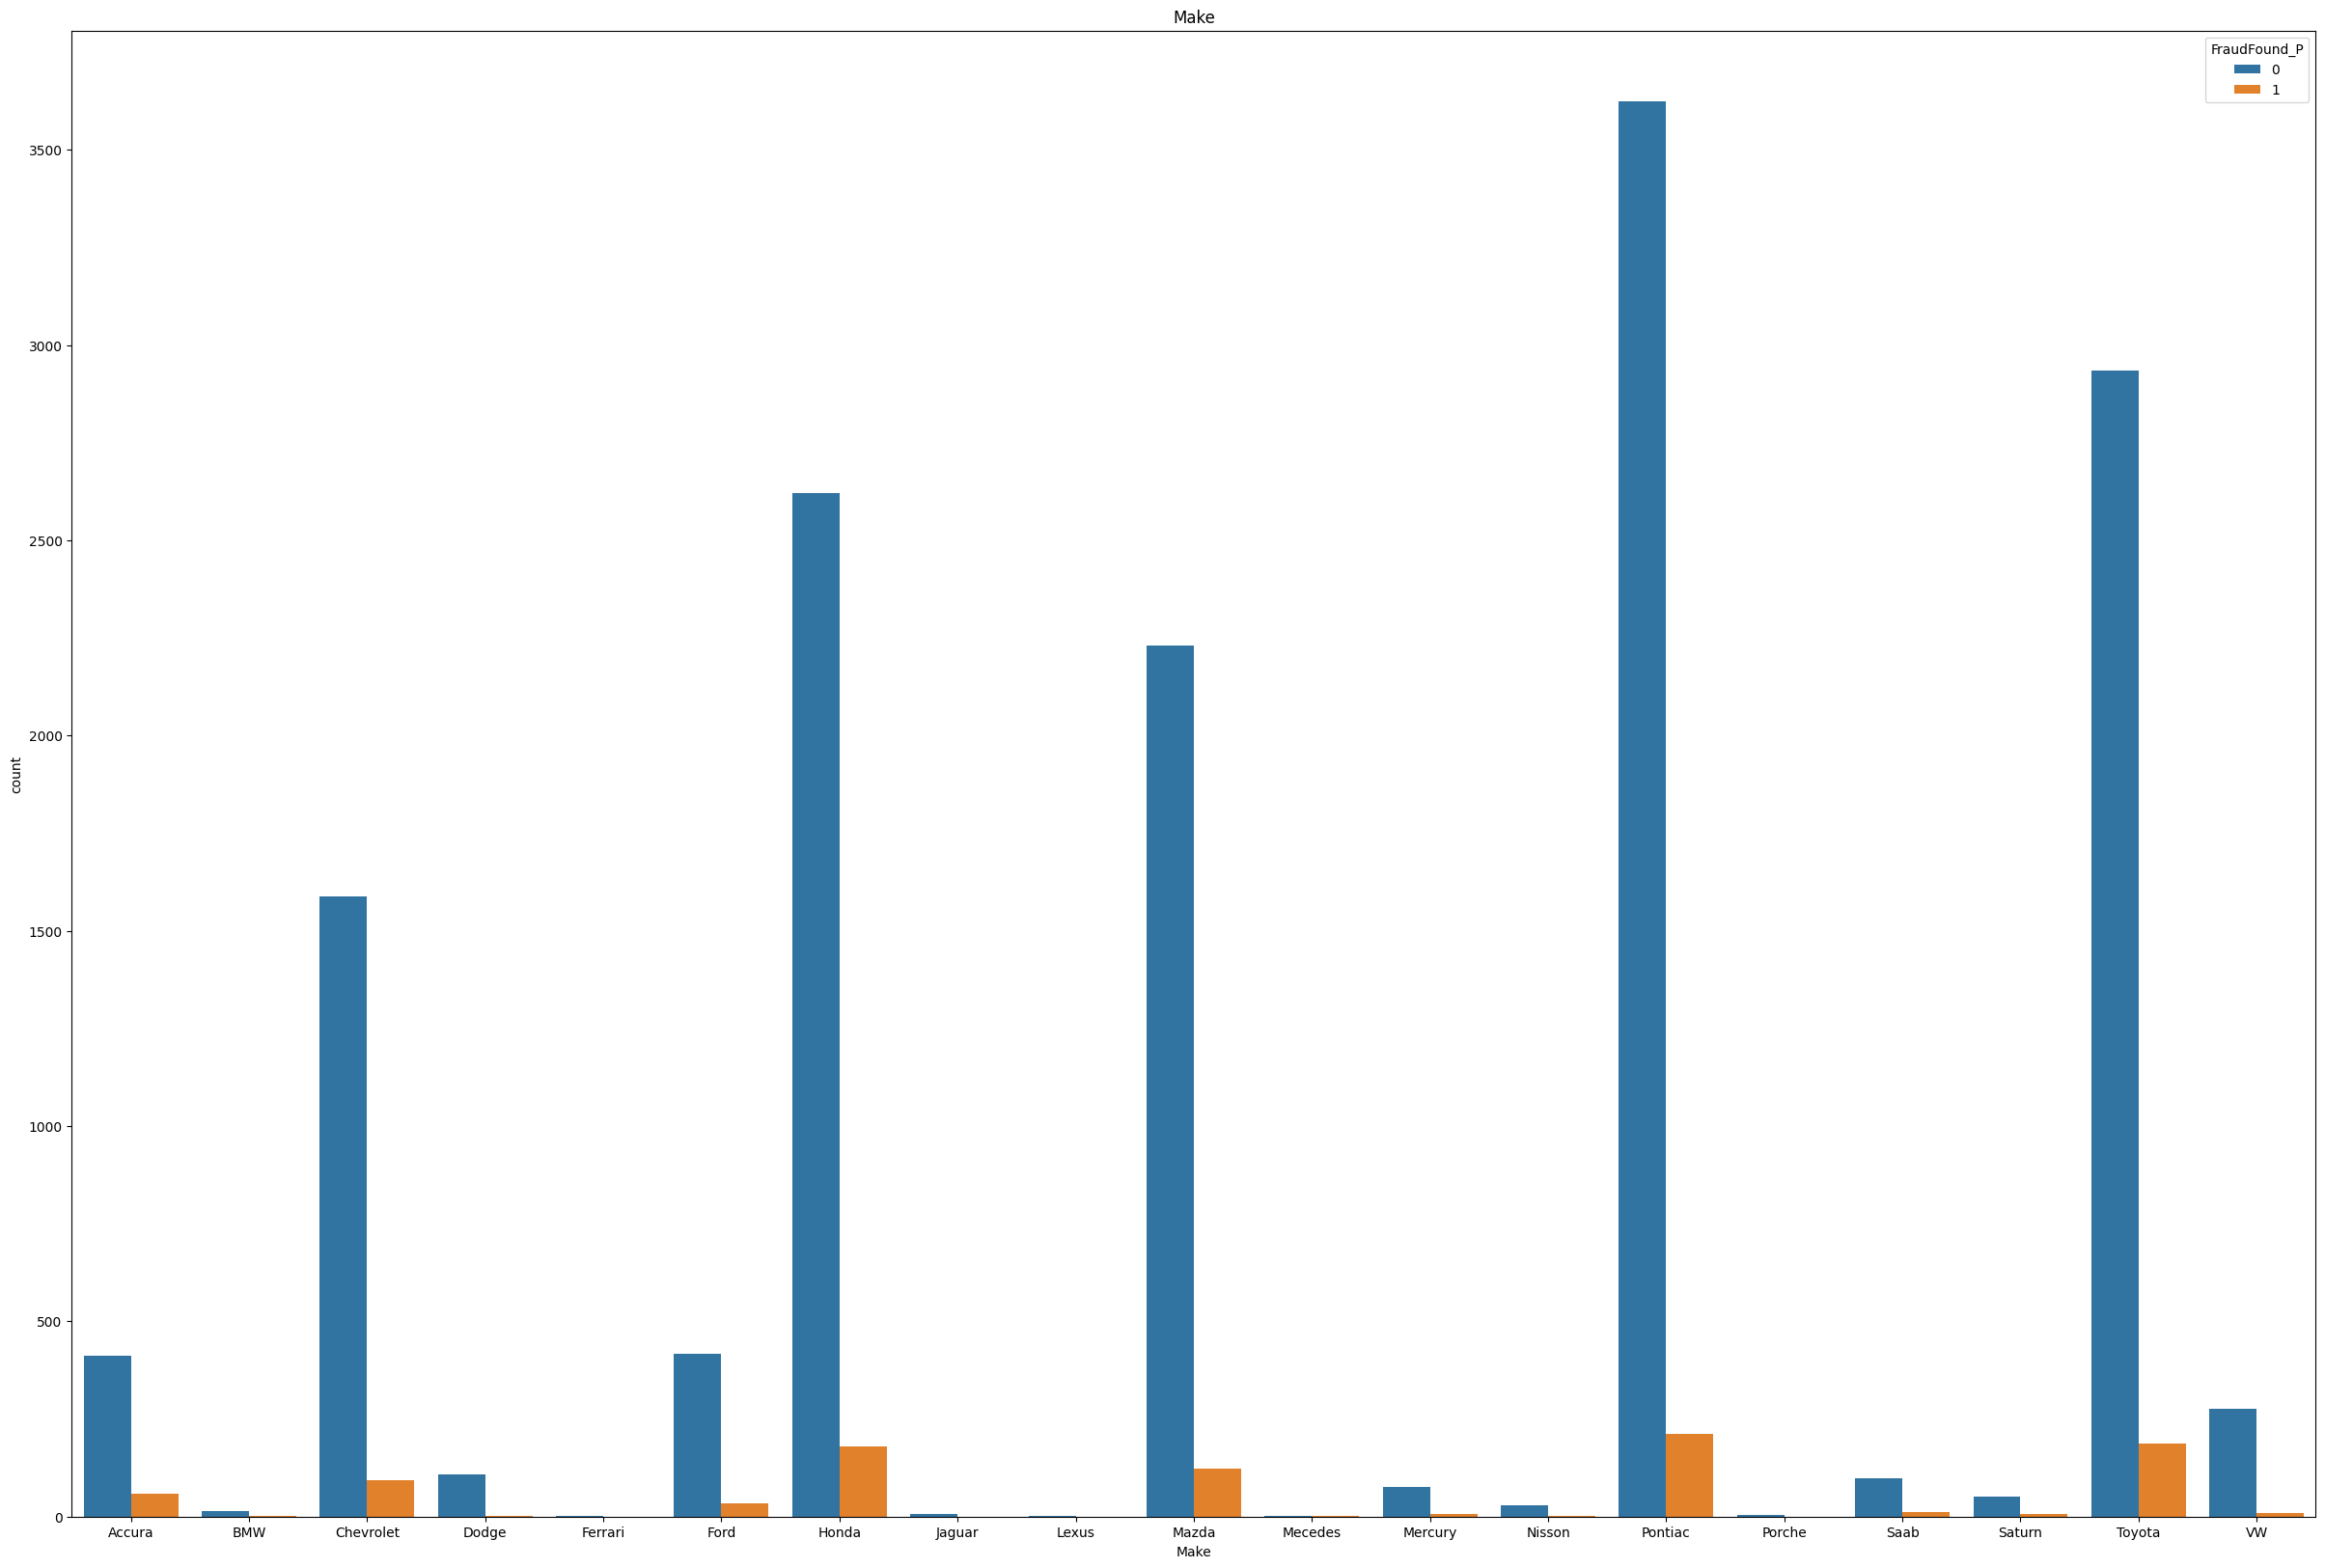

In [ ]:
# Membuat gambar dengan ukuran tertentu
plt.figure(figsize=(30,20))

# Mendapatkan urutan nilai unik dalam kolom "Make" dan mengurutkannya
order = sorted(df["Make"].unique())

# Membuat countplot menggunakan seaborn untuk kolom "Make" dengan urutan nilai yang telah diurutkan
sns.countplot(data=df, x="Make", hue=df["FraudFound_P"], order=order)

# Menetapkan judul plot
plt.title("Make")

Berdasarkan hasil grafik pada kolom "Make" menunjukan merk mobil Pontiac banyak yang mengklaim asuransi dan juga banyak klaim asuransi palsu. Kemudian pada merk mobil Lexus dan Ferrari paling sedikit klaim asuransi maupun klaim asuransi palsu.


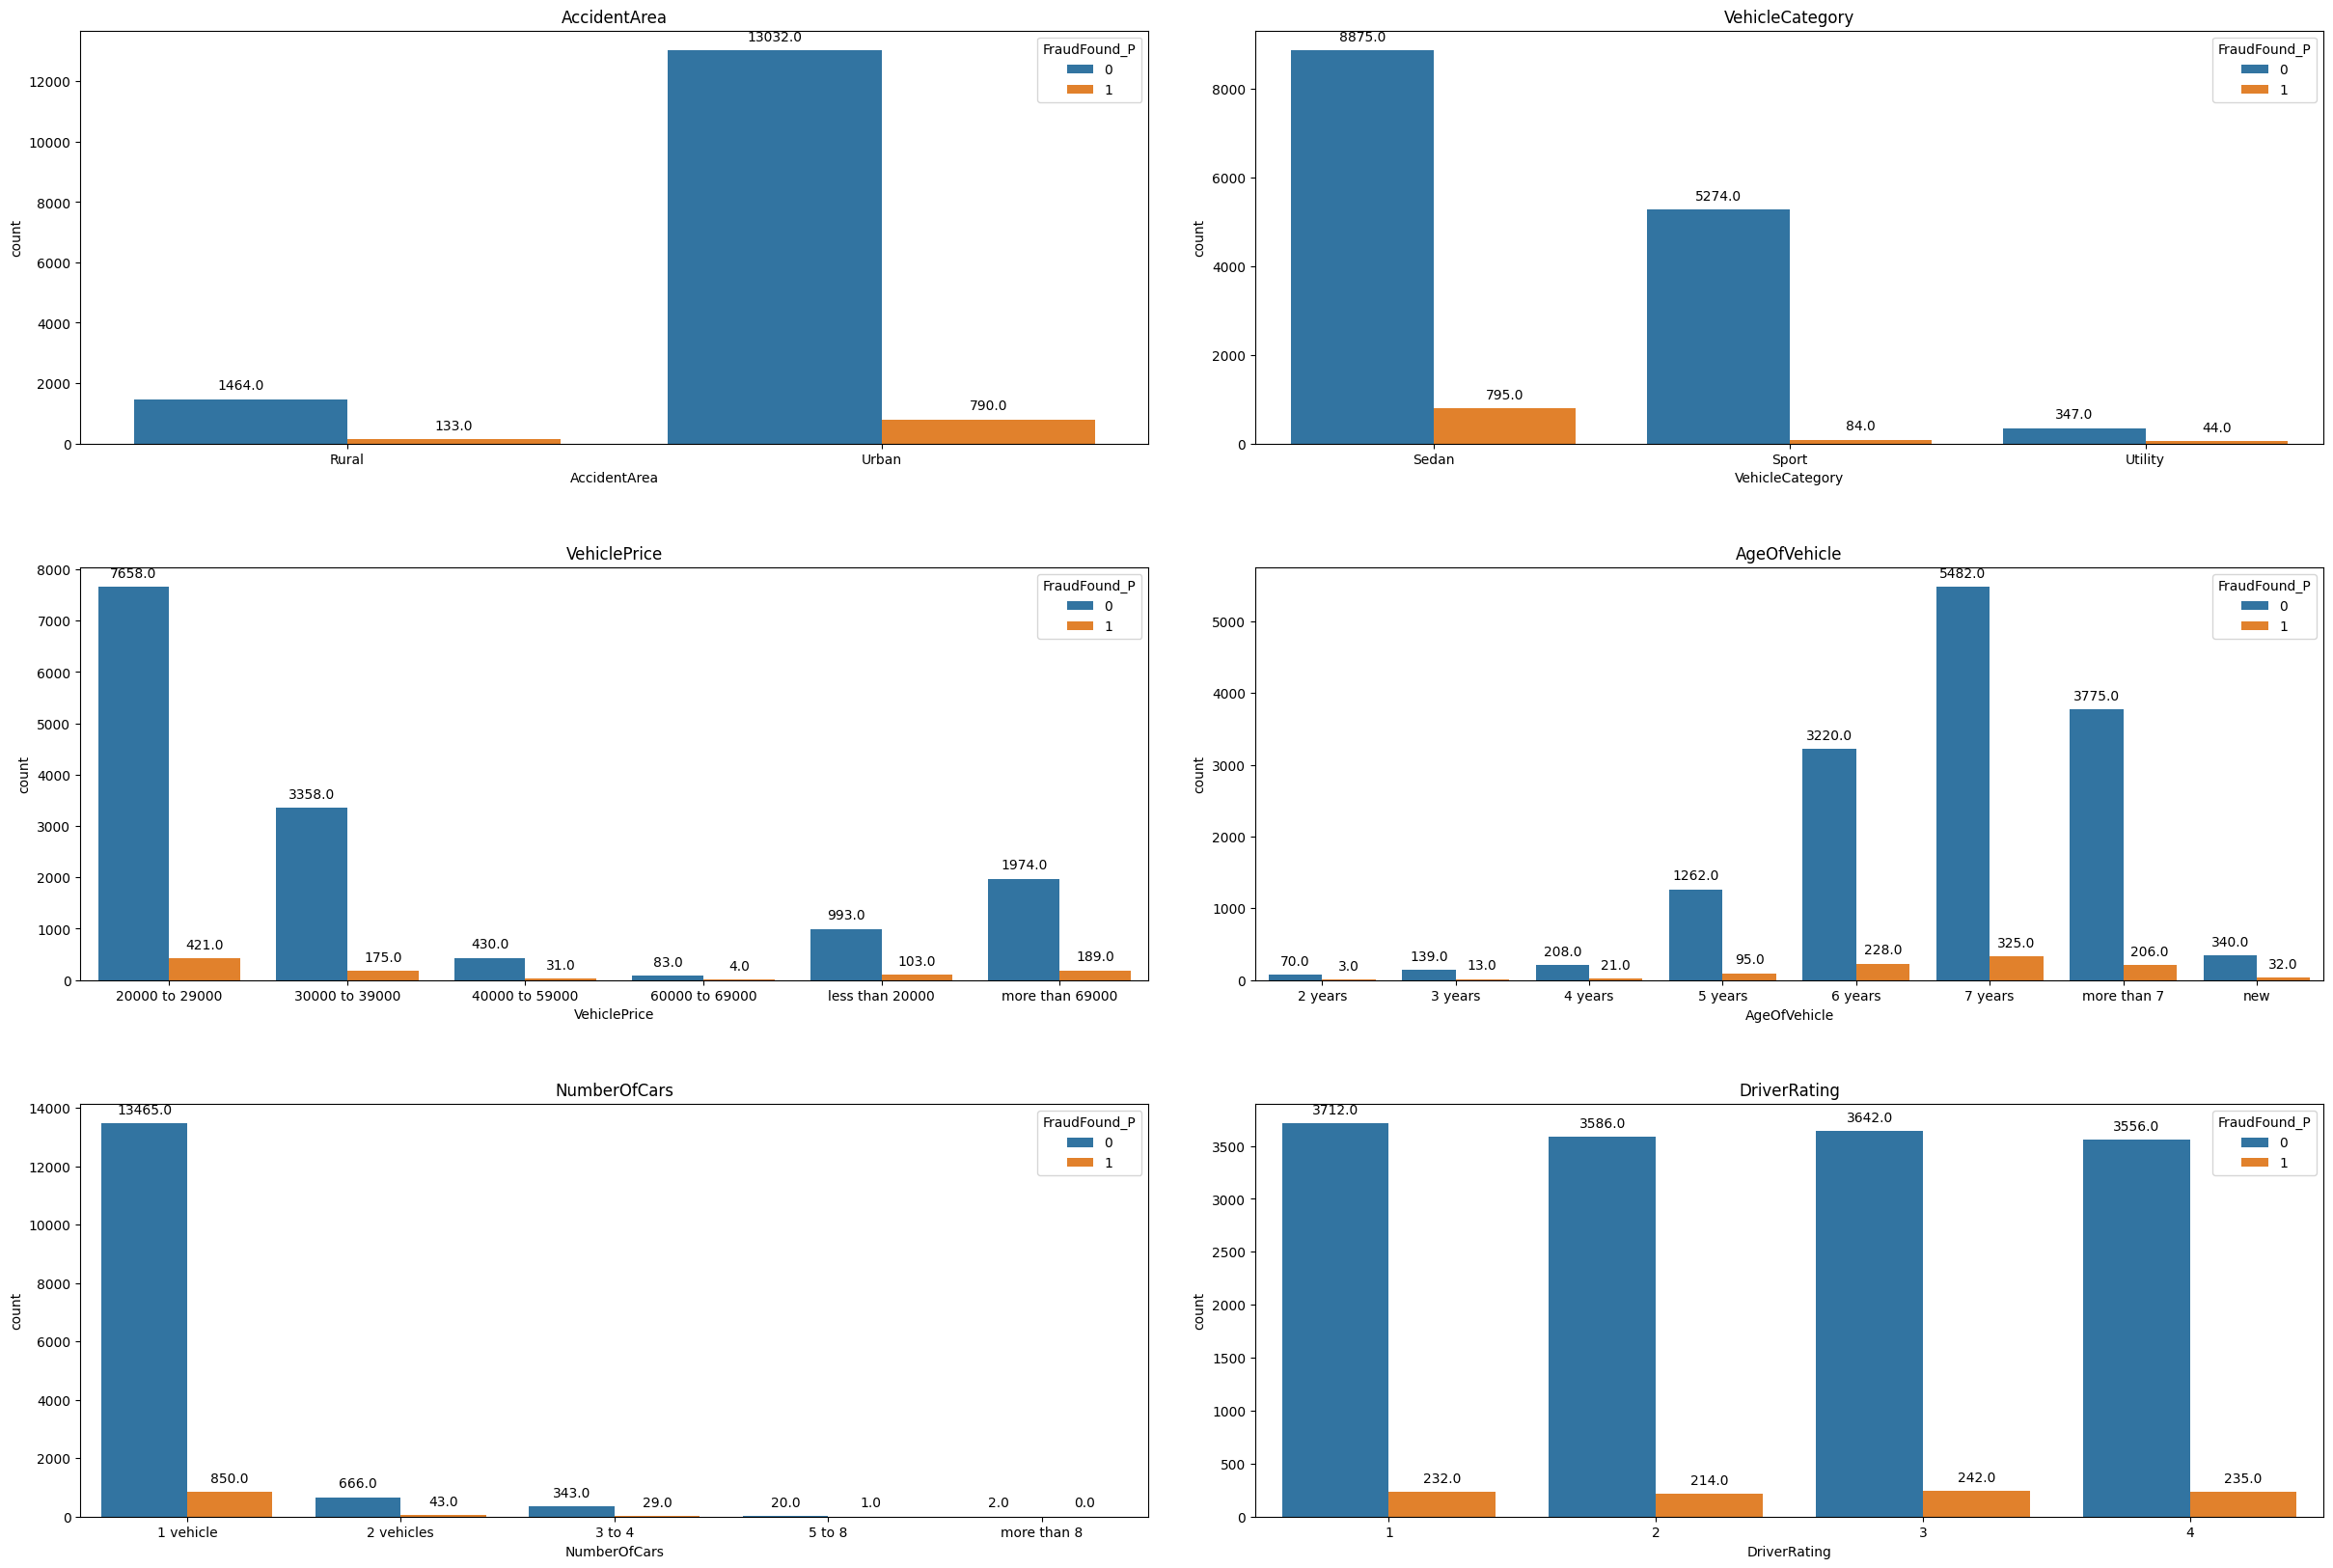

In [ ]:
def plotbar(columns, target, df):
    # Membuat gambar subplot dengan ukuran tertentu
    fig, ax = plt.subplots(3, 2, figsize=(30, 20))

    # Iterasi melalui setiap kolom yang diberikan
    for i, column in enumerate(columns):
        # Mendapatkan urutan nilai unik dalam kolom tertentu dan mengurutkannya
        order = sorted(df[column].unique())

        # Membuat countplot menggunakan seaborn untuk kolom tertentu dengan urutan nilai yang telah diurutkan
        sns.countplot(data=df, x=column, hue=target, order=order, ax=ax[i // 2][i % 2])

        # Menambahkan nilai di atas setiap bar
        for p in ax[i // 2][i % 2].patches:
            ax[i // 2][i % 2].annotate(f'{p.get_height()}',
                                       (p.get_x() + p.get_width() / 2., p.get_height()),
                                       ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                                       textcoords='offset points')

        # Menetapkan judul subplot sesuai dengan nama kolom yang sedang diproses
        ax[i // 2][i % 2].set_title(column)

    # Menyesuaikan ruang antara subplot
    plt.subplots_adjust(hspace=0.3, wspace=0.1)

# Memanggil fungsi plotbar dengan kolom yang akan diplot dan kolom target
plotbar(["AccidentArea", "VehicleCategory", "VehiclePrice", "AgeOfVehicle", "NumberOfCars", "DriverRating"], 'FraudFound_P', df)

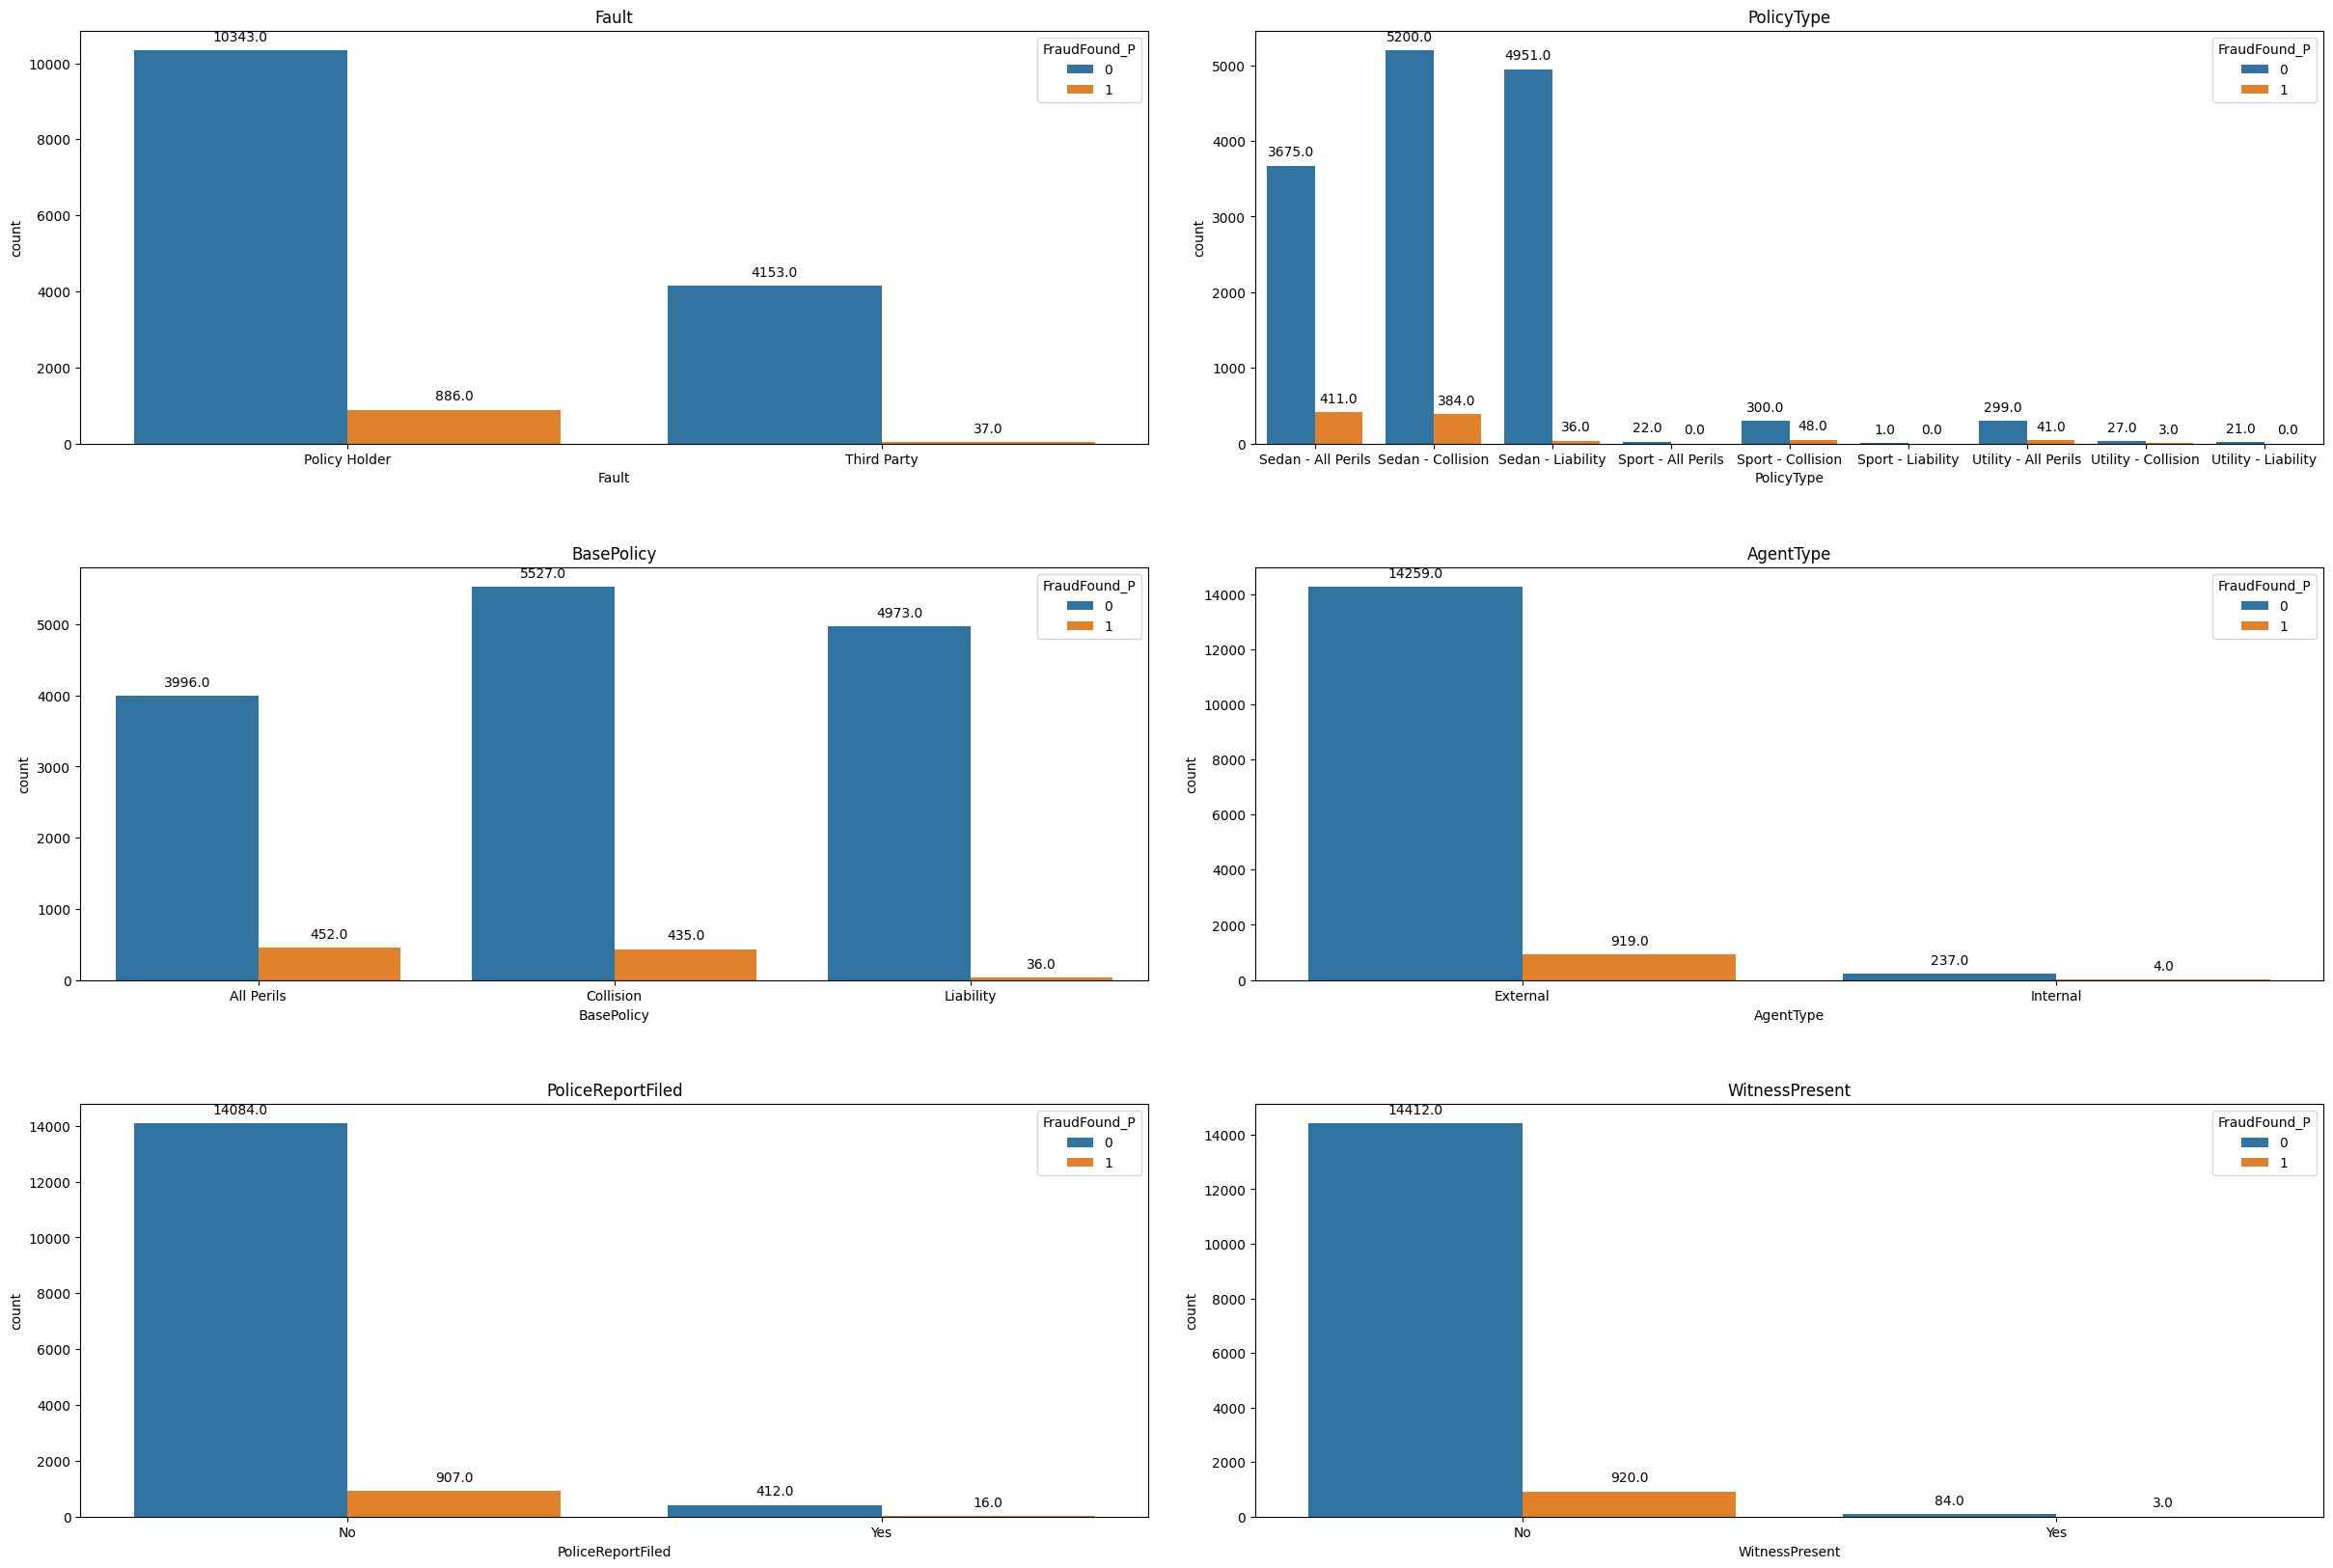

In [ ]:
def plotbar(columns, target):
    # Membuat gambar subplot dengan ukuran tertentu
    fig, ax = plt.subplots(3, 2, figsize=(30, 20))

    # Iterasi melalui setiap kolom yang diberikan
    for i, column in enumerate(columns):
        # Mendapatkan urutan nilai unik dalam kolom tertentu dan mengurutkannya
        order = sorted(df[column].unique())

        # Membuat countplot menggunakan seaborn untuk kolom tertentu dengan urutan nilai yang telah diurutkan
        sns.countplot(data=df, x=column, hue=target, order=order, ax=ax[i // 2][i % 2])

        # Menambahkan nilai di atas setiap bar
        for p in ax[i // 2][i % 2].patches:
            ax[i // 2][i % 2].annotate(f'{p.get_height()}',
                                       (p.get_x() + p.get_width() / 2., p.get_height()),
                                       ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                                       textcoords='offset points')

        # Menetapkan judul subplot sesuai dengan nama kolom yang sedang diproses
        ax[i // 2][i % 2].set_title(column)

    # Menyesuaikan ruang antara subplot
    plt.subplots_adjust(hspace=0.3, wspace=0.1)

# Memanggil fungsi plotbar dengan kolom yang akan diplot dan kolom target
plotbar(["Fault", "PolicyType", "BasePolicy", "AgentType", "PoliceReportFiled", "WitnessPresent"], df['FraudFound_P'])

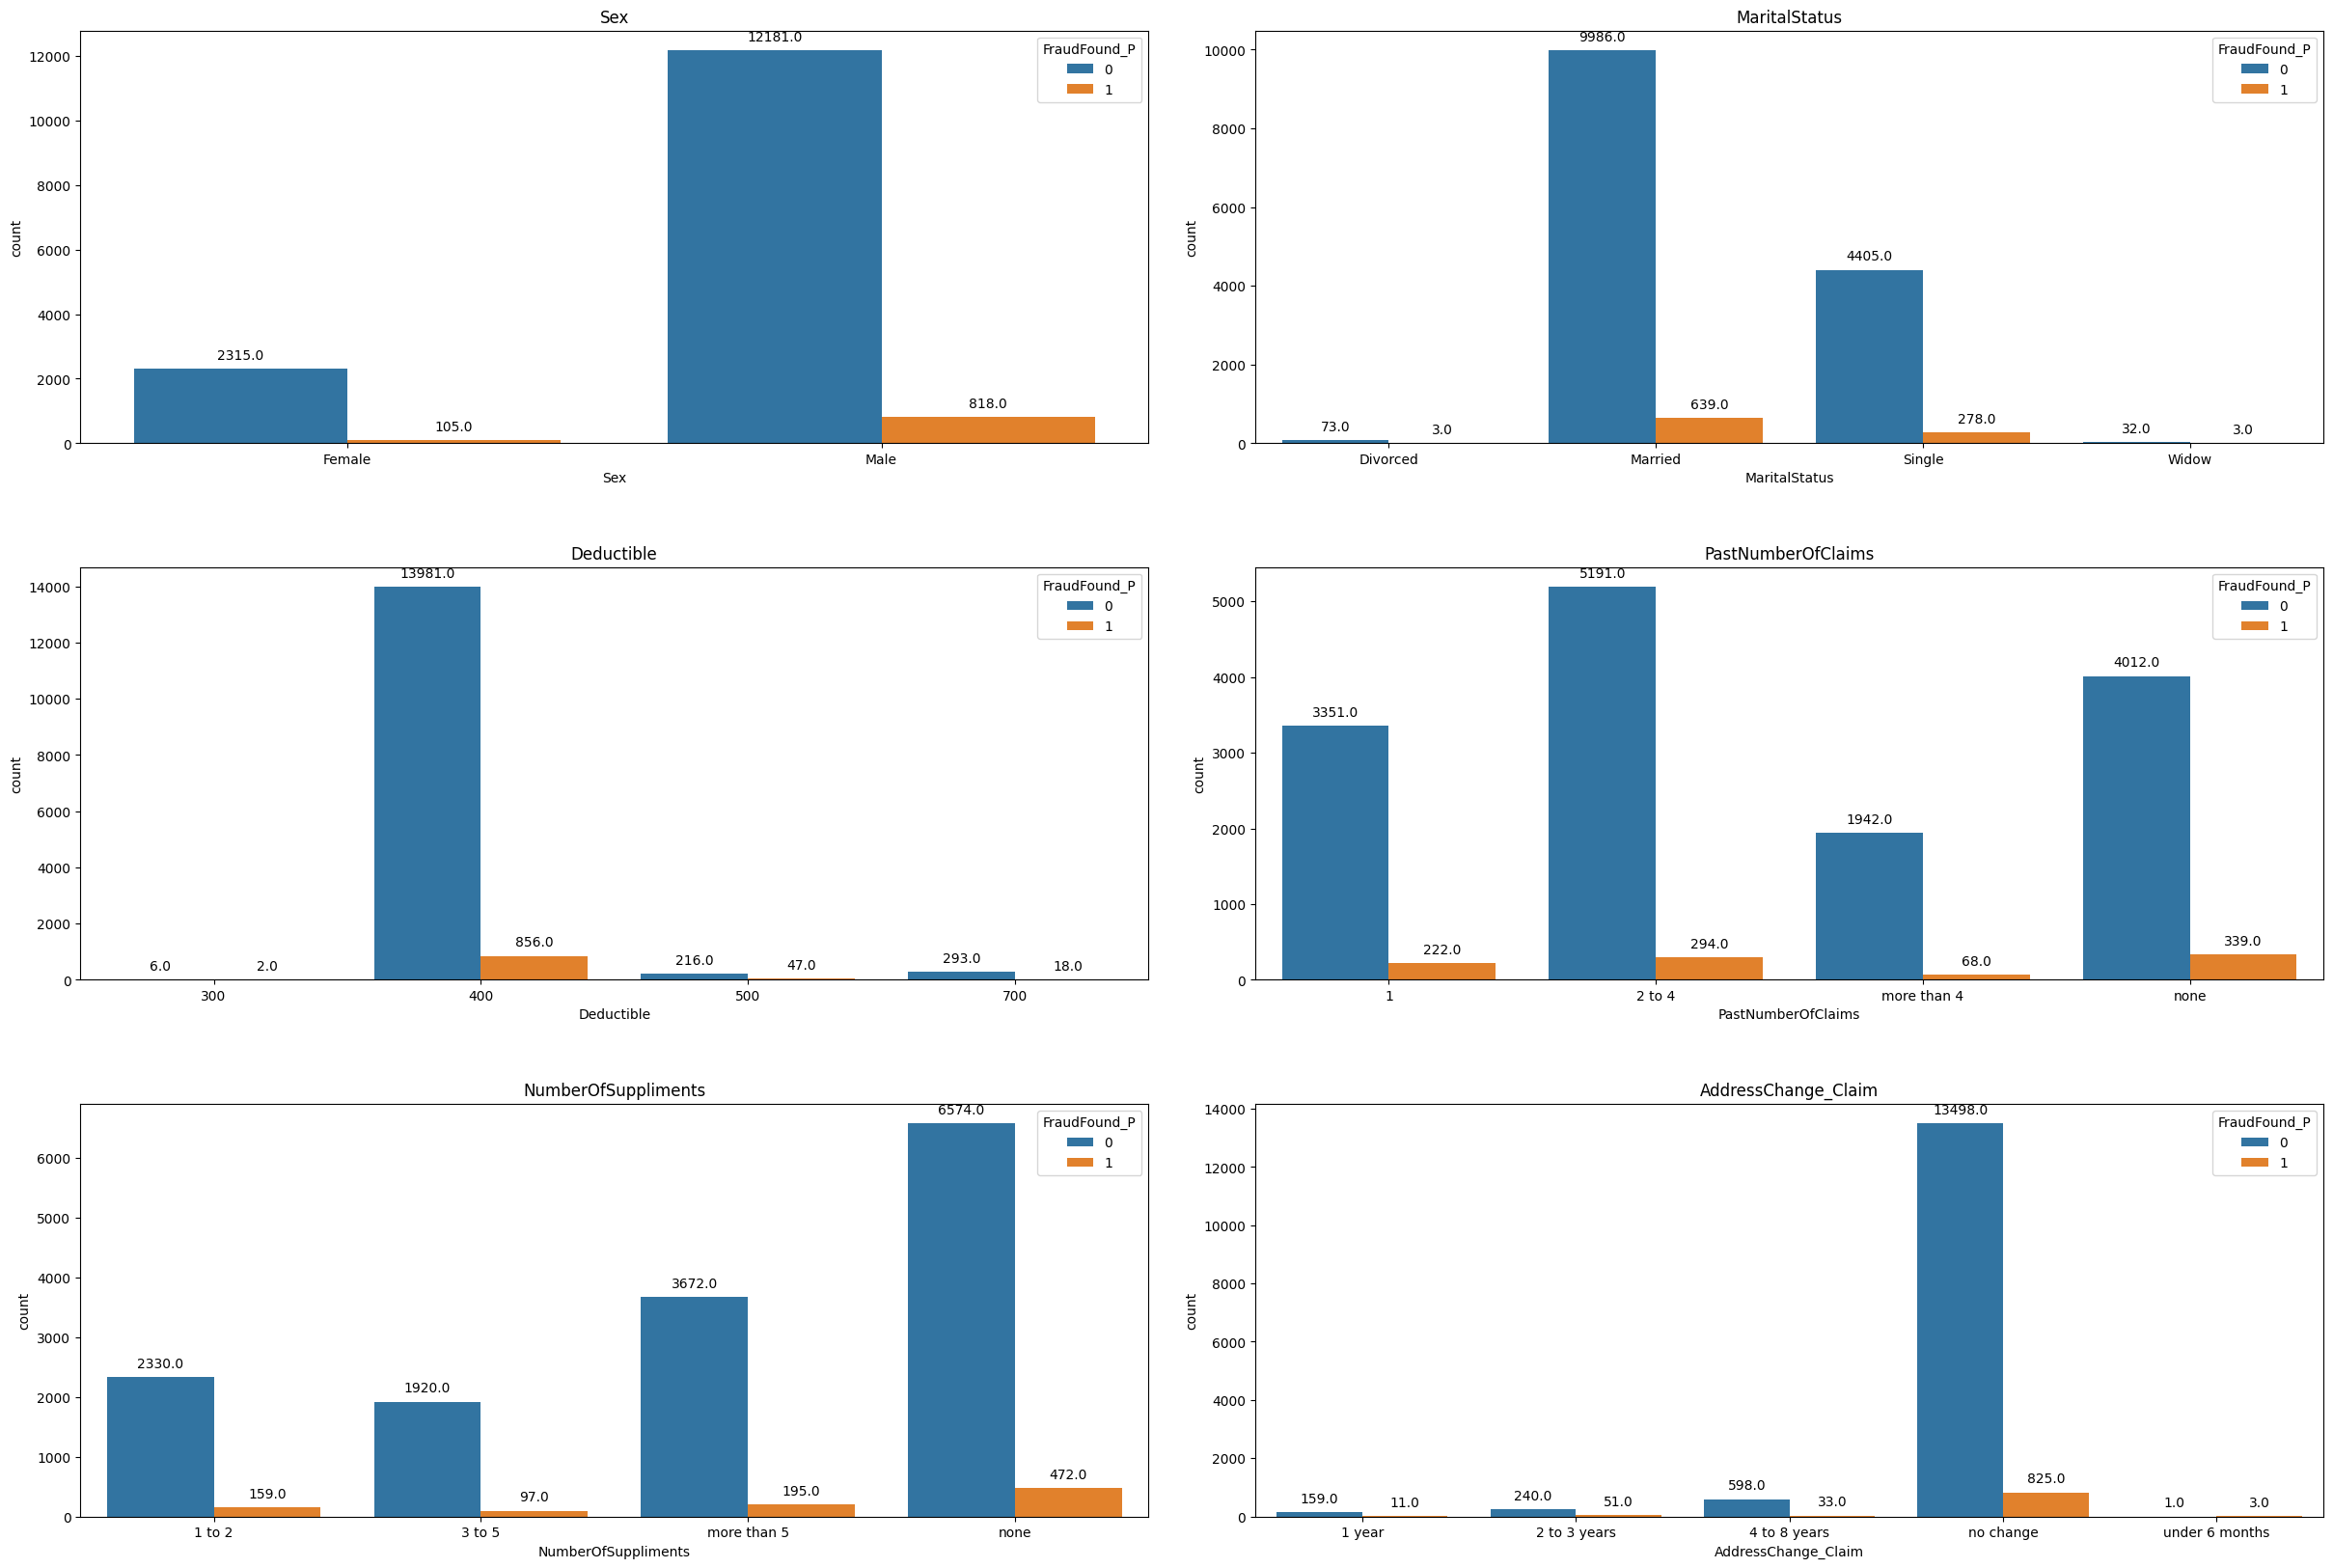

In [ ]:
def plotbar(columns, target):
    # Membuat gambar subplot dengan ukuran tertentu
    fig, ax = plt.subplots(3, 2, figsize=(30, 20))

    # Iterasi melalui setiap kolom yang diberikan
    for i, column in enumerate(columns):
        # Mendapatkan urutan nilai unik dalam kolom tertentu dan mengurutkannya
        order = sorted(df[column].unique())

        # Membuat countplot menggunakan seaborn untuk kolom tertentu dengan urutan nilai yang telah diurutkan
        sns.countplot(data=df, x=column, hue=target, order=order, ax=ax[i // 2][i % 2])

        # Menambahkan nilai di atas setiap bar
        for p in ax[i // 2][i % 2].patches:
            ax[i // 2][i % 2].annotate(f'{p.get_height()}',
                                       (p.get_x() + p.get_width() / 2., p.get_height()),
                                       ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                                       textcoords='offset points')

        # Menetapkan judul subplot sesuai dengan nama kolom yang sedang diproses
        ax[i // 2][i % 2].set_title(column)

    # Menyesuaikan ruang antara subplot
    plt.subplots_adjust(hspace=0.3, wspace=0.1)

# Memanggil fungsi plotbar dengan kolom yang akan diplot dan kolom target
plotbar(["Sex", "MaritalStatus", "Deductible", "PastNumberOfClaims", "NumberOfSuppliments", "AddressChange_Claim"], df['FraudFound_P'])

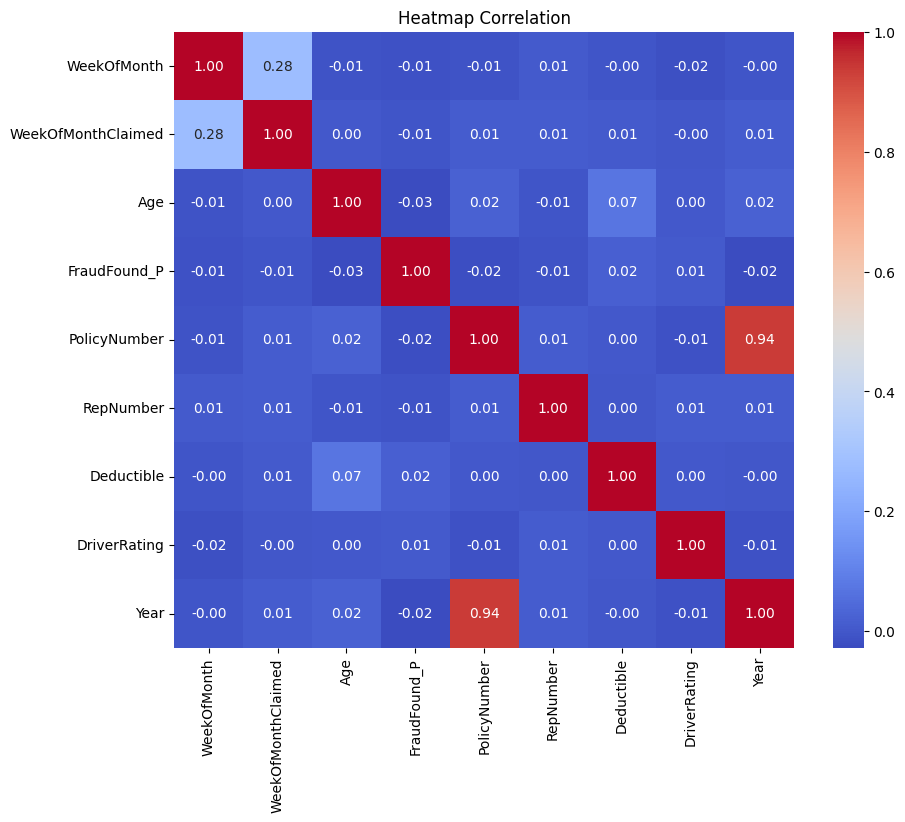

In [ ]:
# Menghitung korelasi antar kolom
df_corr = df.corr()

# Membuat figure untuk plot dengan ukuran 10x8 inch
plt.figure(figsize=(10, 8))

# Menggambar heatmap dengan menggunakan Seaborn
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt=".2f")

# Menambahkan judul pada heatmap
plt.title("Heatmap Correlation")

# Menampilkan plot heatmap yang telah dibuat
plt.show()

Semua variabel numerik memiliki hubungan dengan variabel target (FraudFound_P) walaupun hubunganya tidak terlalu kuat.

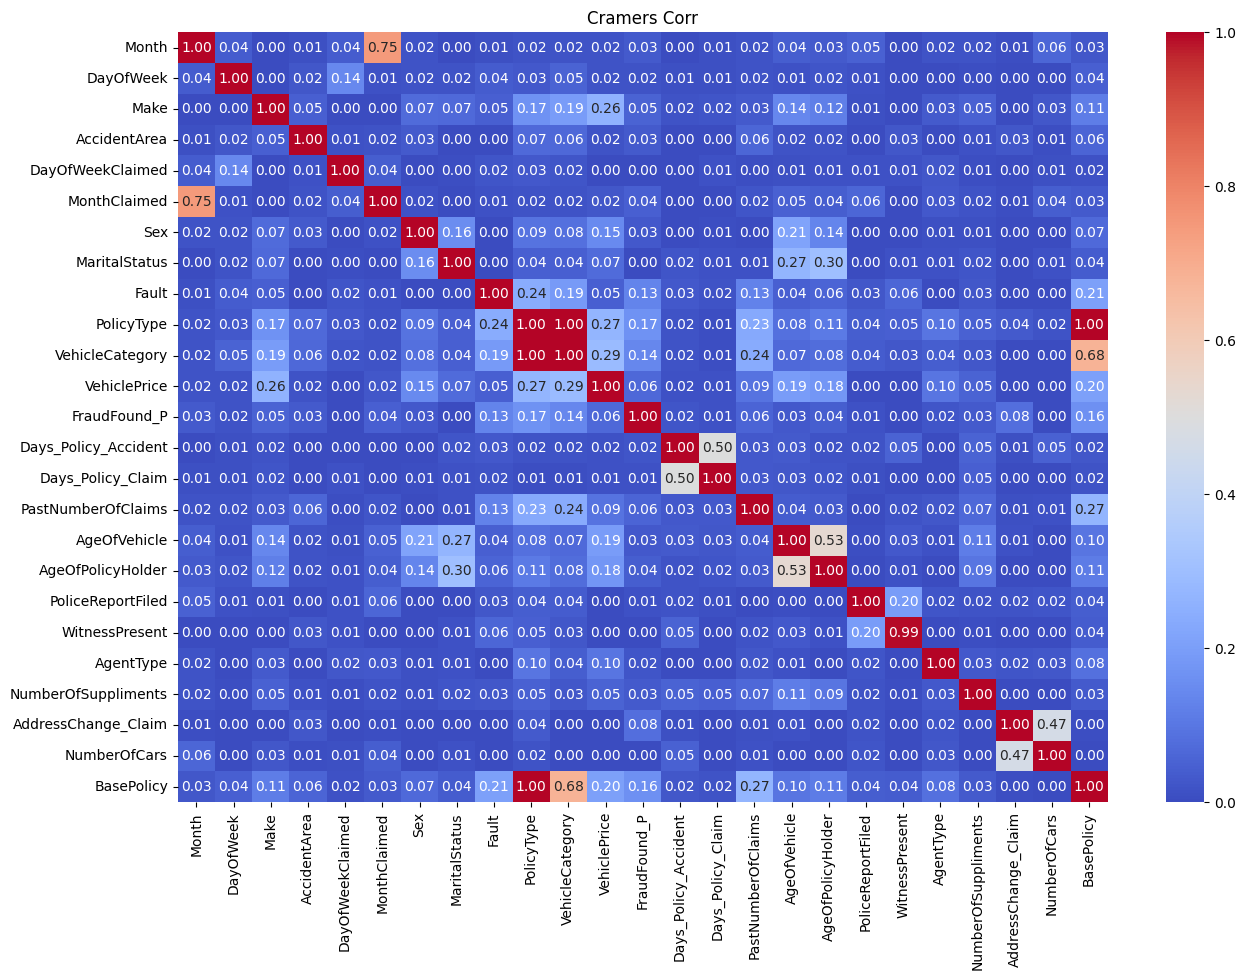

In [ ]:
import scipy.stats as ss

# Inisialisasi sebuah list 'ob' untuk menyimpan nama kolom kategorikal dan target variable
ob = []

# Iterasi melalui setiap kolom dalam dataframe untuk mencari kolom kategorikal dan target variable 'FraudFound_P'
for data in df.columns:
    if data == 'FraudFound_P':
        ob.append(data)  # Menambahkan target variable 'FraudFound_P' ke dalam list
    if df[data].dtype == 'object':
        ob.append(data)  # Menambahkan kolom kategorikal ke dalam list jika tipe datanya 'object'

# Fungsi untuk menghitung Cramér's V
def cramers_v(x, y):
    # Menghasilkan tabel kontingensi antara x dan y
    confusion_matrix = pd.crosstab(x, y)
    # Menghitung chi2 dan nilai lain yang diperlukan untuk Cramér's V
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Membuat dataframe kosong 'cramers_df' dengan index dari list 'ob'
cramers_df = pd.DataFrame(index=ob)

# Menghitung nilai Cramér's V untuk setiap pasangan kolom kategorikal dan menyimpannya dalam dataframe
for x in ob:
    a = []
    for y in ob:
        a.append(cramers_v(df[y], df[x]))  # Menghitung nilai Cramér's V untuk setiap pasangan kolom
    cramers_df[x] = a  # Menyimpan nilai Cramér's V dalam dataframe

# Plot heatmap dari nilai Cramér's V dalam bentuk heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(cramers_df, annot=True, cmap='coolwarm', fmt='.2f')  # Menampilkan heatmap dengan nilai Cramér's V
plt.title('Cramers Corr')  # Menetapkan judul heatmap
plt.show()  # Menampilkan heatmap

Cramér's V adalah metrik statistik yang digunakan untuk mengukur kekuatan hubungan antara dua variabel kategorikal dalam tabel kontingensi. Metrik ini berkisar antara 0 hingga 1, di mana 0 menunjukkan tidak adanya hubungan antara variabel-variabel tersebut dan 1 menunjukkan hubungan yang sangat kuat antara variabel-variabel tersebut. Rumus Cramér's V didasarkan pada nilai chi-square (chi-kuadrat) yang dihasilkan dari tabel kontingensi antara kedua variabel kategorikal.

Berdasarkan hasil tersebut, variabel kategorik yang tidak memiliki hubungan dengan variabel target (FraudFound_P) yaitu DayOfWeekClaimed, MaritalStatus, WitnessPresent, dan NumberOfCars. Kemungkinan variabel-variabel tersebut akan di drop.

### **Data Preparation**

**Handling Outlier**

In [ ]:
# Menghitung quartile pertama (Q1) dan quartile ketiga (Q3) dari kolom 'Age'
Q1_age = df['Age'].quantile(0.25)
Q3_age = df['Age'].quantile(0.75)

# Menghitung interquartile range (IQR) dari kolom 'Age'
IQR_age = Q3_age - Q1_age

# Menentukan batas atas dan batas bawah untuk deteksi outlier pada kolom 'Age'
lower_bound_age = Q1_age - 1.5 * IQR_age
upper_bound_age = Q3_age + 1.5 * IQR_age

# Mendeteksi dan menangani outlier pada kolom 'Age'
outliers_age = (df['Age'] < lower_bound_age) | (df['Age'] > upper_bound_age)
outliers_age.sum()

227

In [ ]:
# Mengganti outlier dengan nilai batas atas
df.loc[outliers_age, 'Age'] = upper_bound_age

**Feature Encoding**

In [ ]:
!pip install category_encoders

In [ ]:
from category_encoders.ordinal import OrdinalEncoder

# Daftar mapping untuk setiap kolom dalam dataset
col_ordering = [
    {'col':'AccidentArea','mapping':{'Urban':1, 'Rural':0}},
    {'col':'Sex','mapping':{'Female':1, 'Male':0}},
    {'col':'Fault','mapping':{'Policy Holder':1, 'Third Party':0}},
    {'col':'PoliceReportFiled','mapping':{'Yes':1, 'No':0}},
    {'col':'WitnessPresent','mapping':{'Yes':1, 'No':0}},
    {'col':'AgentType','mapping':{'External':1, 'Internal':0}},
    {'col':'Month','mapping':{'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}},
    {'col':'DayOfWeek','mapping':{'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7}},
    {'col':'DayOfWeekClaimed','mapping':{'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7}},
    {'col':'MonthClaimed','mapping':{'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}},
    {'col':'PastNumberOfClaims','mapping':{'none':0 ,'1':1,'2 to 4':2,'more than 4':3 }},
    {'col':'NumberOfSuppliments','mapping':{'none':0,'1 to 2':1,'3 to 5':2,'more than 5':3}},
    {'col':'VehiclePrice','mapping':{'less than 20000':0,'20000 to 29000':1,'30000 to 39000':2,'40000 to 59000':3,'60000 to 69000':4,'more than 69000':5}},
    {'col':'AgeOfVehicle','mapping':{'3 years':3,'6 years':6,'7 years':7,'more than 7':8,'5 years':5,'new':0,'4 years':4,'2 years':2}},
    {'col':'Days_Policy_Accident','mapping':{'more than 30':4,'15 to 30':3,'none':0,'1 to 7':1,'8 to 15':2}},
    {'col':'Days_Policy_Claim','mapping':{'more than 30':4,'15 to 30':3,'none':0,'1 to 7':1,'8 to 15':2}},
    {'col':'AgeOfPolicyHolder','mapping':{'16 to 17':1,'18 to 20':2,'21 to 25':3,'26 to 30':4,'31 to 35':5,'36 to 40':6, '41 to 50':7,'51 to 65':8,'over 65':9}},
    {'col':'AddressChange_Claim','mapping':{'no change':0,'under 6 months':1,'1 year':2,'2 to 3 years':3,'4 to 8 years':4}},
    {'col':'NumberOfCars','mapping':{'1 vehicle':1,'2 vehicles':2,'3 to 4':3,'5 to 8':4,'more than 8':5}},
    {'col':'Make','mapping':{'Accura':1, 'BMW':2, 'Chevrolet':3, 'Dodge':4, 'Ferrari':5, 'Ford':6, 'Honda':7, 'Jaguar':8, 'Lexus':9, 'Mazda':10, 'Mecedes':11, 'Mercury':12, 'Nisson':13, 'Pontiac':14, 'Porche':15, 'Saab':16, 'Saturn':17, 'Toyota':18, 'VW':19}},
    {'col':'MaritalStatus','mapping':{'Divorced':1, 'Married':2, 'Single':3, 'Widow':4}},
    {'col':'VehicleCategory','mapping':{'Sedan':1, 'Sport':2, 'Utility':3}},
    {'col':'BasePolicy','mapping':{'All Perils':1, 'Collision':2, 'Liability':3}},
    {'col':'PolicyType','mapping':{'Sedan - All Perils':1, 'Sedan - Collision':2, 'Sedan - Liability':3, 'Sport - All Perils':4, 'Sport - Collision':5, 'Sport - Liability':6, 'Utility - All Perils':7, 'Utility - Collision':8, 'Utility - Liability':9}}
]

# Membuat encoder dengan menggunakan daftar mapping yang sudah ditentukan
ord_encoder = OrdinalEncoder(mapping=col_ordering, return_df=True)

# Melakukan transformasi ordinal pada 'df' berdasarkan mapping yang telah ditentukan
df = ord_encoder.fit_transform(df)
df

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,12,5,3,7,1,2,1,1,1,3,...,3,4,0,0,1,0,2,3,1994,3
1,1,3,3,7,1,1,1,4,0,3,...,6,5,1,0,1,0,0,1,1994,2
2,10,5,5,7,1,4,11,2,0,2,...,7,7,0,0,1,0,0,1,1994,2
3,6,2,6,18,0,5,7,1,0,2,...,8,8,1,0,1,3,0,1,1994,3
4,1,5,1,7,1,2,2,2,1,3,...,5,5,0,0,1,0,0,1,1994,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15414,11,4,5,18,1,2,11,5,0,2,...,6,5,0,0,1,0,0,1,1996,2
15415,11,5,4,14,1,5,12,1,0,2,...,6,5,0,0,1,3,0,3,1996,3
15416,11,5,4,18,0,5,12,1,0,3,...,5,4,0,0,1,1,0,1,1996,2
15417,12,1,1,18,1,4,12,2,1,2,...,2,5,0,0,1,3,0,1,1996,1


**Feature Selection**

Berdasarkan nilai chi-square atau Cramér's V yang sudah dilakukan sebelumnya, fitur yang tidak memiliki hubangan dengan variabel target adalah DayOfWeekClaimed, MaritalStatus, WitnessPresent, dan NumberOfCars. Oleh karena itu, variabel-variabel tersebut akan di drop. Kemudian kami akan mendrop fitur PolicyNumber karena hanya nomor identitas saja seperti index yaitu hanya urutan angka dari 1 sampai 15420.

In [ ]:
# Menghapus kolom yang tidak berpengaruh
df = df.drop(['PolicyNumber', 'MaritalStatus', 'WitnessPresent', 'NumberOfCars', 'DayOfWeekClaimed'], axis=1)

**Feature Scaling**

Feature Scaling berkaitan dengan menyesuaikan skala dari fitur-fitur numerik dalam dataset agar memiliki rentang atau skala yang seragam. Teknik seperti Standard Scaling (z-score normalization) atau Min-Max Scaling digunakan untuk menyesuaikan nilai-nilai fitur sehingga memiliki rentang yang seragam.

Pada umumnya algoritma Support Vector Machine (SVM) memerlukan feature scaling untuk performa yang lebih baik. SVM bekerja dengan mengidentifikasi hyperplane terbaik yang memisahkan kelas data. Kinerjanya dapat dipengaruhi oleh skala atau rentang nilai dari setiap fitur.

SVM memperhitungkan jarak antara titik data dan hyperplane untuk menentukan batas keputusan. Jika fitur-fitur memiliki rentang atau skala yang berbeda, hal ini bisa mengakibatkan masalah di mana fitur dengan nilai yang lebih besar akan memiliki pengaruh yang lebih besar dalam menentukan hyperplane. Feature scaling membantu untuk memastikan kontribusi fitur seragam dalam menentukan batas keputusan.

Pada penelitian ini akan dilakukan feature scaling menggunakan Min-Max Scaling. Min-Max scaling adalah metode normalisasi yang mengubah fitur-fitur numerik dalam suatu dataset ke dalam rentang nilai tertentu, biasanya antara 0 dan 1. Proses ini dilakukan dengan mengurangi nilai terkecil dalam setiap fitur dan kemudian membagi seluruh rentang nilai fitur tersebut dengan selisih nilai maksimum dan minimumnya.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Pisahkan kolom 'FraudFound_P' dari data frame
target = df['FraudFound_P']
features = df.drop('FraudFound_P', axis=1)

# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Melakukan MinMax Scaling pada data fitur-fitur numerik (tanpa kolom 'FraudFound_P')
features_scaled = scaler.fit_transform(features)

# Mengonversi hasil scaling menjadi DataFrame baru dengan nama kolom yang sesuai
features_df = pd.DataFrame(features_scaled, columns=features.columns, index=features.index)

# Gabungkan kembali dengan kolom 'FraudFound_P'
df = pd.concat([features_df, target], axis=1)

# Menampilkan hasil scaling
df

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,MonthClaimed,WeekOfMonthClaimed,Sex,Age,Fault,...,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,AgentType,NumberOfSuppliments,AddressChange_Claim,Year,BasePolicy,FraudFound_P
0,1.000000,1.00,0.333333,0.333333,1.0,0.000000,0.00,1.0,0.086957,1.0,...,0.000000,0.375,0.375,0.0,1.0,0.000000,0.5,0.0,1.0,0
1,0.000000,0.50,0.333333,0.333333,1.0,0.000000,0.75,0.0,0.313043,1.0,...,0.000000,0.750,0.500,1.0,1.0,0.000000,0.0,0.0,0.5,0
2,0.818182,1.00,0.666667,0.333333,1.0,0.909091,0.25,0.0,0.539130,1.0,...,0.333333,0.875,0.750,0.0,1.0,0.000000,0.0,0.0,0.5,0
3,0.454545,0.25,0.833333,0.944444,0.0,0.545455,0.00,0.0,0.852174,0.0,...,0.333333,1.000,0.875,1.0,1.0,1.000000,0.0,0.0,1.0,0
4,0.000000,1.00,0.000000,0.333333,1.0,0.090909,0.25,1.0,0.191304,0.0,...,0.000000,0.625,0.500,0.0,1.0,0.000000,0.0,0.0,0.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15414,0.909091,0.75,0.666667,0.944444,1.0,0.909091,1.00,0.0,0.330435,1.0,...,0.666667,0.750,0.500,0.0,1.0,0.000000,0.0,1.0,0.5,1
15415,0.909091,1.00,0.500000,0.722222,1.0,1.000000,0.00,0.0,0.243478,1.0,...,1.000000,0.750,0.500,0.0,1.0,1.000000,0.0,1.0,1.0,0
15416,0.909091,1.00,0.500000,0.944444,0.0,1.000000,0.00,0.0,0.139130,1.0,...,1.000000,0.625,0.375,0.0,1.0,0.333333,0.0,1.0,0.5,1
15417,1.000000,0.00,0.000000,0.944444,1.0,1.000000,0.25,1.0,0.313043,0.0,...,0.000000,0.250,0.500,0.0,1.0,1.000000,0.0,1.0,0.0,0


### **Modeling**

Modeling akan dilakukan dengan membandingkan model SVM dengan tiga kernel berbeda dan data yang digunakan (Imbalance data, Oversampling data, dan Undersampling data). Kernel yang digunakan antara lain:
*   Linear Kernel: Menggunakan fungsi linear untuk transformasi data ke dimensi yang lebih tinggi.
*   Polynomial Kernel: Menggunakan fungsi polynomial untuk transformasi data ke dimensi yang lebih tinggi.
*   RBF (Radial Basis Function) Kernel: Menggunakan fungsi RBF untuk transformasi data ke dimensi yang tak terhingga.

**Imbalance Data**

In [ ]:
X = df.drop('FraudFound_P', axis=1)
y = df['FraudFound_P']

In [ ]:
# Membagi dataset menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Mengetahui jumlah target data train
y_train.value_counts()

0    11597
1      738
Name: FraudFound_P, dtype: int64

In [ ]:
# Mengetahui jumlah target data test
y_test.value_counts()

0    2899
1     185
Name: FraudFound_P, dtype: int64

**Support Vector Machine**

In [ ]:
# Support Vector Machine Kernel Linear
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
svm_linear_pred = svm.predict(X_test)

print('Accuracy:', round(accuracy_score(y_test, svm_linear_pred) * 100, 2))
print('Precision:', round(precision_score(y_test, svm_linear_pred) * 100, 2))
print('Recall:', round(recall_score(y_test, svm_linear_pred) * 100, 2))
print('F1 Score:', round(f1_score(y_test, svm_linear_pred) * 100, 2))

print("Classification Report:")
print(classification_report(y_test, svm_linear_pred))

Accuracy: 94.0
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2899
           1       0.00      0.00      0.00       185

    accuracy                           0.94      3084
   macro avg       0.47      0.50      0.48      3084
weighted avg       0.88      0.94      0.91      3084



In [ ]:
# Support Vector Machine Kernel RBF
svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)
svm_rbf_pred = svm.predict(X_test)

print('Accuracy:', round(accuracy_score(y_test, svm_rbf_pred) * 100, 2))
print('Precision:', round(precision_score(y_test, svm_rbf_pred) * 100, 2))
print('Recall:', round(recall_score(y_test, svm_rbf_pred) * 100, 2))
print('F1 Score:', round(f1_score(y_test, svm_rbf_pred) * 100, 2))

print("Classification Report:")
print(classification_report(y_test, svm_rbf_pred))

Accuracy: 94.0
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2899
           1       0.00      0.00      0.00       185

    accuracy                           0.94      3084
   macro avg       0.47      0.50      0.48      3084
weighted avg       0.88      0.94      0.91      3084



In [ ]:
# Support Vector Machine Kernel Polynomial
svm = SVC(kernel='poly', degree=3)
svm.fit(X_train, y_train)
svm_poly_pred = svm.predict(X_test)

print('Accuracy:', round(accuracy_score(y_test, svm_poly_pred) * 100, 2))
print('Precision:', round(precision_score(y_test, svm_poly_pred) * 100, 2))
print('Recall:', round(recall_score(y_test, svm_poly_pred) * 100, 2))
print('F1 Score:', round(f1_score(y_test, svm_poly_pred) * 100, 2))

print("Classification Report:")
print(classification_report(y_test, svm_poly_pred))

Accuracy: 94.0
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2899
           1       0.00      0.00      0.00       185

    accuracy                           0.94      3084
   macro avg       0.47      0.50      0.48      3084
weighted avg       0.88      0.94      0.91      3084



**Random Forest**

In [ ]:
# Random Forest
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
rf_pred = random_forest.predict(X_test)

print('Accuracy:', round(accuracy_score(y_test, rf_pred) * 100, 2))
print('Precision:', round(precision_score(y_test, rf_pred) * 100, 2))
print('Recall:', round(recall_score(y_test, rf_pred) * 100, 2))
print('F1 Score:', round(f1_score(y_test, rf_pred) * 100, 2))

print("Classification Report:")
print(classification_report(y_test, rf_pred))

Accuracy: 94.07
Precision: 75.0
Recall: 1.62
F1 Score: 3.17
Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2899
           1       0.75      0.02      0.03       185

    accuracy                           0.94      3084
   macro avg       0.85      0.51      0.50      3084
weighted avg       0.93      0.94      0.91      3084



**Gradient Boosting**

In [ ]:
# Gradient Boosting
gradient_boosting = GradientBoostingClassifier()
gradient_boosting.fit(X_train, y_train)
gb_pred = gradient_boosting.predict(X_test)

print('Accuracy:', round(accuracy_score(y_test, gb_pred) * 100, 2))
print('Precision:', round(precision_score(y_test, gb_pred) * 100, 2))
print('Recall:', round(recall_score(y_test, gb_pred) * 100, 2))
print('F1 Score:', round(f1_score(y_test, gb_pred) * 100, 2))

print("Classification Report:")
print(classification_report(y_test, gb_pred))

Accuracy: 94.13
Precision: 100.0
Recall: 2.16
F1 Score: 4.23
Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2899
           1       1.00      0.02      0.04       185

    accuracy                           0.94      3084
   macro avg       0.97      0.51      0.51      3084
weighted avg       0.94      0.94      0.91      3084



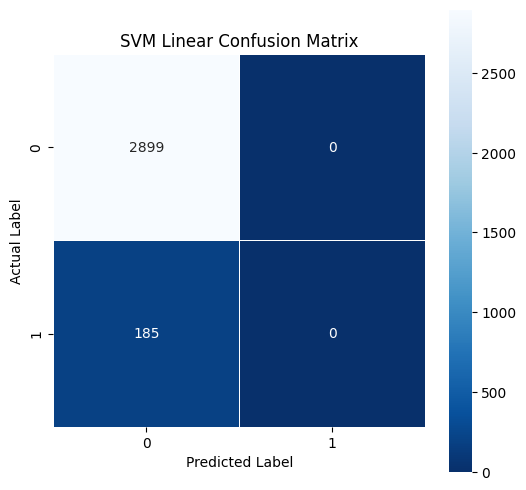

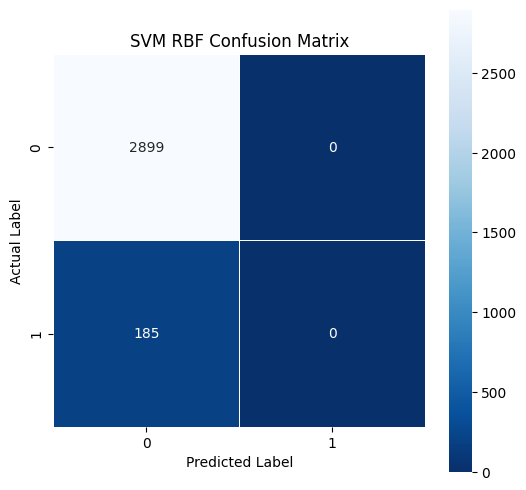

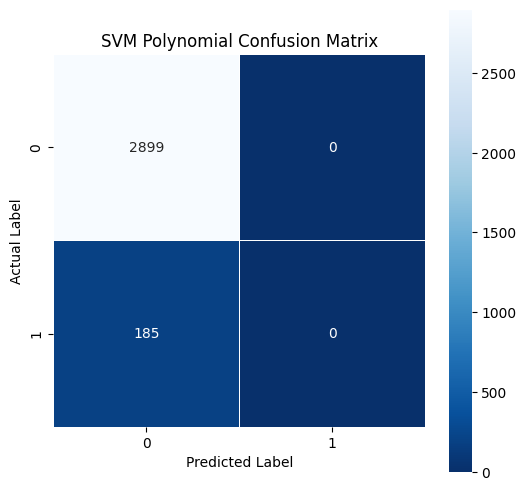

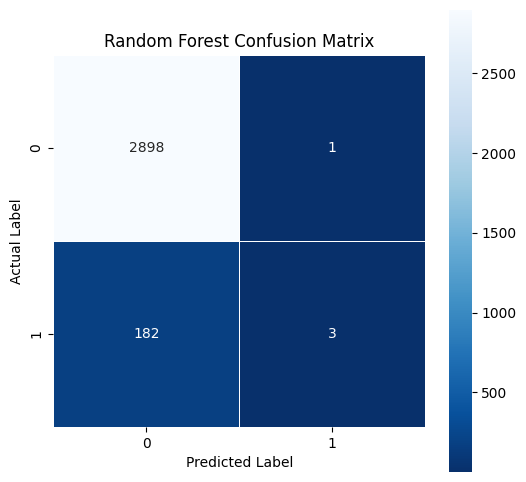

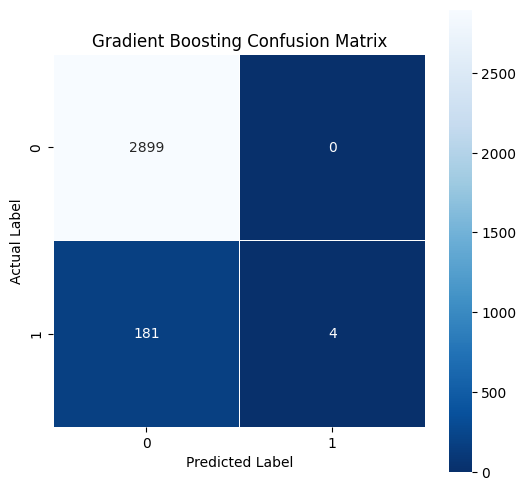

In [ ]:
# Confusion Matrix Imbalance Data
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, title):
  cm = confusion_matrix(y_true, y_pred)
  plt.figure(figsize=(6,6))
  sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square=True, cmap='Blues_r')
  plt.ylabel('Actual Label')
  plt.xlabel('Predicted Label')
  plt.title(title)

plot_confusion_matrix(y_test, svm_linear_pred, 'SVM Linear Confusion Matrix')
plt.show()

plot_confusion_matrix(y_test, svm_rbf_pred, 'SVM RBF Confusion Matrix')
plt.show()

plot_confusion_matrix(y_test, svm_poly_pred, 'SVM Polynomial Confusion Matrix')
plt.show()

plot_confusion_matrix(y_test, rf_pred, 'Random Forest Confusion Matrix')
plt.show()

plot_confusion_matrix(y_test, gb_pred, 'Gradient Boosting Confusion Matrix')
plt.show()

Berdasarkan hasil evaluasi model menggunakan data yang tidak seimbang, semua model SVM menghasilkan nilai akurasi yang sama yaitu sebesar 94%. Namun model tersebut tidak baik karena untuk nilai precision, recall, dan F1-score nya 0 yang menandakan bahwa model hanya memprediksi klaim tidak palsu saja, untuk klaim palsu nya tidak terdeteksi. Kemudian untuk nilai akurasi model Random Forest adalah 94,07% dan Gradient Boosting sebesar 94,13%.

**Oversampling**

Oversampling adalah teknik yang digunakan untuk menyeimbangkan distribusi kelas dalam dataset dengan jumlah sampel yang tidak seimbang. Ketika dataset memiliki ketidakseimbangan kelas di mana satu kelas memiliki jumlah sampel yang jauh lebih sedikit dari kelas lainnya, oversampling meningkatkan jumlah sampel pada kelas minoritas sehingga setiap kelas memiliki jumlah sampel yang lebih serupa.

Ada beberapa teknik oversampling, salah satunya adalah SMOTE (Synthetic Minority Over-sampling Technique). SMOTE menciptakan sampel sintetis baru untuk kelas minoritas dengan cara memilih sampel acak dari kelas minoritas dan membuat sampel sintetis baru berdasarkan tetangga-tetangga terdekat dari sampel-sampel tersebut. Ini membantu meningkatkan representasi kelas minoritas tanpa hanya menggandakan atau menambahkan sampel yang ada.

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Oversampling dengan SMOTE pada data latih (X_train dan y_train)
oversample = SMOTE(random_state=42)
X_over, y_over = oversample.fit_resample(X_train, y_train)

# Membagi dataset oversampled menjadi data latih dan uji
X_train_over, X_test, y_train_over, y_test = train_test_split(X_over, y_over, test_size=0.2, random_state=42, stratify=y_over)

# Menampilkan jumlah target setelah proses oversampling
print('After Oversampling:\n', y_train_over.value_counts())

After Oversampling:
 1    9278
0    9277
Name: FraudFound_P, dtype: int64


**Support Vector Machine**

In [ ]:
# Support Vector Machine Kernel Linear
svm = SVC(kernel='linear')
svm.fit(X_train_over, y_train_over)
svm_over_linear_pred = svm.predict(X_test)

print('Accuracy:', round(accuracy_score(y_test, svm_over_linear_pred) * 100, 2))
print('Precision:', round(precision_score(y_test, svm_over_linear_pred) * 100, 2))
print('Recall:', round(recall_score(y_test, svm_over_linear_pred) * 100, 2))
print('F1 Score:', round(f1_score(y_test, svm_over_linear_pred) * 100, 2))

print("Classification Report:")
print(classification_report(y_test, svm_over_linear_pred))

Accuracy: 76.46
Precision: 69.94
Recall: 92.8
F1 Score: 79.76
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.60      0.72      2320
           1       0.70      0.93      0.80      2319

    accuracy                           0.76      4639
   macro avg       0.80      0.76      0.76      4639
weighted avg       0.80      0.76      0.76      4639



In [ ]:
# Support Vector Machine Kernel RBF
svm = SVC(kernel='rbf')
svm.fit(X_train_over, y_train_over)
svm_over_rbf_pred = svm.predict(X_test)

print('Accuracy:', round(accuracy_score(y_test, svm_over_rbf_pred) * 100, 2))
print('Precision:', round(precision_score(y_test, svm_over_rbf_pred) * 100, 2))
print('Recall:', round(recall_score(y_test, svm_over_rbf_pred) * 100, 2))
print('F1 Score:', round(f1_score(y_test, svm_over_rbf_pred) * 100, 2))

print("Classification Report:")
print(classification_report(y_test, svm_over_rbf_pred))

Accuracy: 86.89
Precision: 80.92
Recall: 96.55
F1 Score: 88.05
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.77      0.85      2320
           1       0.81      0.97      0.88      2319

    accuracy                           0.87      4639
   macro avg       0.88      0.87      0.87      4639
weighted avg       0.88      0.87      0.87      4639



In [ ]:
# Support Vector Machine Kernel Polynomial
svm = SVC(kernel='poly', degree=3)
svm.fit(X_train_over, y_train_over)
svm_over_poly_pred = svm.predict(X_test)

print('Accuracy:', round(accuracy_score(y_test, svm_over_poly_pred) * 100, 2))
print('Precision:', round(precision_score(y_test, svm_over_poly_pred) * 100, 2))
print('Recall:', round(recall_score(y_test, svm_over_poly_pred) * 100, 2))
print('F1 Score:', round(f1_score(y_test, svm_over_poly_pred) * 100, 2))

print("Classification Report:")
print(classification_report(y_test, svm_over_poly_pred))

Accuracy: 87.07
Precision: 81.22
Recall: 96.42
F1 Score: 88.17
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.78      0.86      2320
           1       0.81      0.96      0.88      2319

    accuracy                           0.87      4639
   macro avg       0.88      0.87      0.87      4639
weighted avg       0.88      0.87      0.87      4639



**Random Forest**

In [ ]:
# Random Forest
random_forest = RandomForestClassifier()
random_forest.fit(X_train_over, y_train_over)
rf_over_pred = random_forest.predict(X_test)

print('Accuracy:', round(accuracy_score(y_test, rf_over_pred) * 100, 2))
print('Precision:', round(precision_score(y_test, rf_over_pred) * 100, 2))
print('Recall:', round(recall_score(y_test, rf_over_pred) * 100, 2))
print('F1 Score:', round(f1_score(y_test, rf_over_pred) * 100, 2))

print("Classification Report:")
print(classification_report(y_test, rf_over_pred))

Accuracy: 97.31
Precision: 99.02
Recall: 95.56
F1 Score: 97.26
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      2320
           1       0.99      0.96      0.97      2319

    accuracy                           0.97      4639
   macro avg       0.97      0.97      0.97      4639
weighted avg       0.97      0.97      0.97      4639



**Gradient Boosting**

In [ ]:
# Gradient Boosting
gradient_boosting = GradientBoostingClassifier()
gradient_boosting.fit(X_train_over, y_train_over)
gb_over_pred = gradient_boosting.predict(X_test)

print('Accuracy:', round(accuracy_score(y_test, gb_over_pred) * 100, 2))
print('Precision:', round(precision_score(y_test, gb_over_pred) * 100, 2))
print('Recall:', round(recall_score(y_test, gb_over_pred) * 100, 2))
print('F1 Score:', round(f1_score(y_test, gb_over_pred) * 100, 2))

print("Classification Report:")
print(classification_report(y_test, gb_over_pred))

Accuracy: 96.55
Precision: 99.14
Recall: 93.92
F1 Score: 96.46
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      2320
           1       0.99      0.94      0.96      2319

    accuracy                           0.97      4639
   macro avg       0.97      0.97      0.97      4639
weighted avg       0.97      0.97      0.97      4639



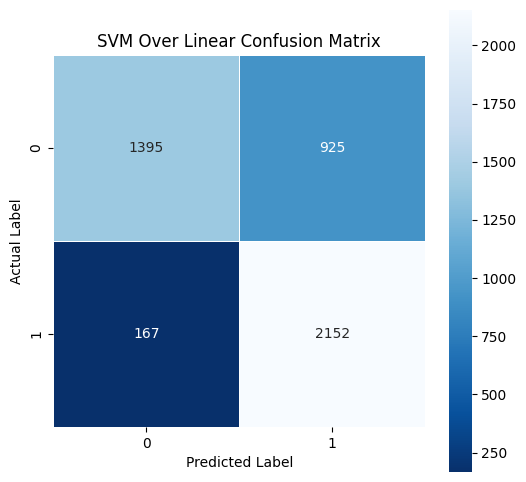

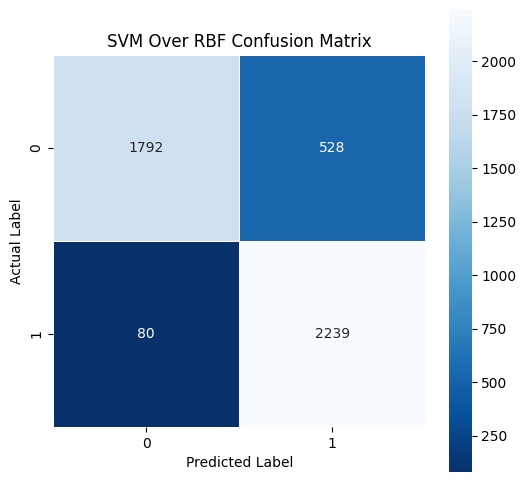

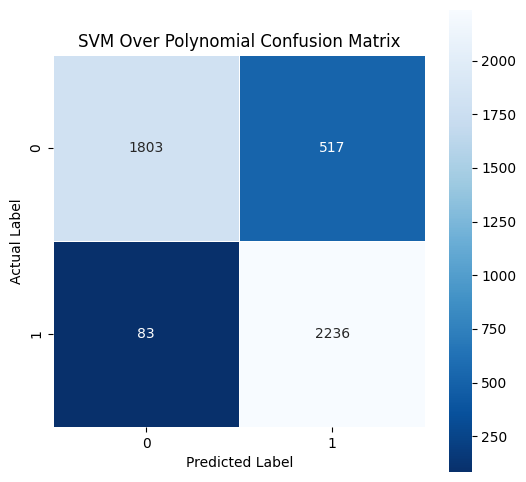

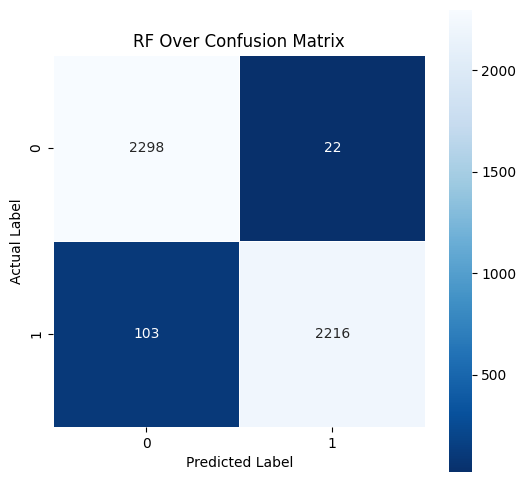

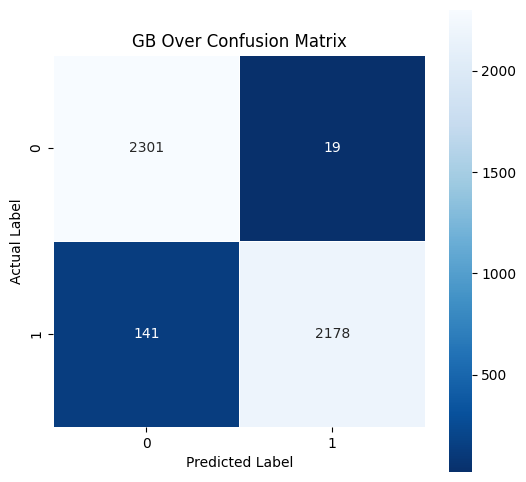

In [ ]:
# Confusion Matrix Oversampling Data
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, title):
  cm = confusion_matrix(y_true, y_pred)
  plt.figure(figsize=(6,6))
  sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square=True, cmap='Blues_r')
  plt.ylabel('Actual Label')
  plt.xlabel('Predicted Label')
  plt.title(title)

plot_confusion_matrix(y_test, svm_over_linear_pred, 'SVM Over Linear Confusion Matrix')
plt.show()

plot_confusion_matrix(y_test, svm_over_rbf_pred, 'SVM Over RBF Confusion Matrix')
plt.show()

plot_confusion_matrix(y_test, svm_over_poly_pred, 'SVM Over Polynomial Confusion Matrix')
plt.show()

plot_confusion_matrix(y_test, rf_over_pred, 'RF Over Confusion Matrix')
plt.show()

plot_confusion_matrix(y_test, gb_over_pred, 'GB Over Confusion Matrix')
plt.show()

Berdasarkan hasil evaluasi model menggunakan data oversampling, model SVM yang menghasilkan nilai akurasi tertinggi adalah SVM dengan kernel polynomial yaitu sebesar 87,07%. Kemudian untuk nilai akurasi model Random Forest sebesar 97,31% dan Gradient Boosting sebesar 96,55%.

**Undersampling**

Undersampling adalah teknik untuk menyeimbangkan distribusi kelas dalam sebuah dataset dengan mengurangi jumlah sampel dari kelas mayoritas. Saat dataset memiliki ketidakseimbangan kelas, di mana satu kelas memiliki jumlah sampel yang jauh lebih besar daripada yang lainnya, teknik ini mengurangi jumlah sampel dari kelas mayoritas agar lebih seimbang dengan kelas minoritas.

Dengan mengurangi jumlah sampel dari kelas mayoritas, dataset menjadi lebih seimbang secara proporsional antara kelas-kelas yang ada. Ini dapat membantu model dalam melakukan pembelajaran yang lebih baik dengan mencegahnya untuk terlalu memihak kelas mayoritas dan mengabaikan kelas minoritas.

In [ ]:
# Menginisialisasi objek RandomUnderSampler dengan sampling_strategy=0.5 dan random_state=42
undersample = RandomUnderSampler(random_state=42)

# Melakukan undersampling pada data latih
X_under, y_under = undersample.fit_resample(X_train, y_train)

# Membagi dataset oversampled menjadi data latih dan uji
X_train_under, X_test, y_train_under, y_test = train_test_split(X_under, y_under, test_size=0.2, random_state=42, stratify=y_under)

# Menampilkan jumlah target setelah proses undersampling
print('After Undersampling:\n', y_under.value_counts())

After Undersampling:
 0    738
1    738
Name: FraudFound_P, dtype: int64


**Support Vector Machine**

In [ ]:
# Support Vector Machine Kernel Linear
svm = SVC(kernel='linear')
svm.fit(X_train_under, y_train_under)
svm_under_linear_pred = svm.predict(X_test)

print('Accuracy:', round(accuracy_score(y_test, svm_under_linear_pred) * 100, 2))
print('Precision:', round(precision_score(y_test, svm_under_linear_pred) * 100, 2))
print('Recall:', round(recall_score(y_test, svm_under_linear_pred) * 100, 2))
print('F1 Score:', round(f1_score(y_test, svm_under_linear_pred) * 100, 2))

print("Classification Report:")
print(classification_report(y_test, svm_under_linear_pred))

Accuracy: 73.31
Precision: 67.0
Recall: 91.89
F1 Score: 77.49
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.55      0.67       148
           1       0.67      0.92      0.77       148

    accuracy                           0.73       296
   macro avg       0.77      0.73      0.72       296
weighted avg       0.77      0.73      0.72       296



In [ ]:
# Support Vector Machine Kernel RBF
svm = SVC(kernel='rbf')
svm.fit(X_train_under, y_train_under)
svm_under_rbf_pred = svm.predict(X_test)

print('Accuracy:', round(accuracy_score(y_test, svm_under_rbf_pred) * 100, 2))
print('Precision:', round(precision_score(y_test, svm_under_rbf_pred) * 100, 2))
print('Recall:', round(recall_score(y_test, svm_under_rbf_pred) * 100, 2))
print('F1 Score:', round(f1_score(y_test, svm_under_rbf_pred) * 100, 2))

print("Classification Report:")
print(classification_report(y_test, svm_under_rbf_pred))

Accuracy: 73.65
Precision: 66.99
Recall: 93.24
F1 Score: 77.97
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.54      0.67       148
           1       0.67      0.93      0.78       148

    accuracy                           0.74       296
   macro avg       0.78      0.74      0.73       296
weighted avg       0.78      0.74      0.73       296



In [ ]:
# Support Vector Machine Kernel Polynomial
svm = SVC(kernel='poly', degree=3)
svm.fit(X_train_under, y_train_under)
svm_under_poly_pred = svm.predict(X_test)

print('Accuracy:', round(accuracy_score(y_test, svm_under_poly_pred) * 100, 2))
print('Precision:', round(precision_score(y_test, svm_under_poly_pred) * 100, 2))
print('Recall:', round(recall_score(y_test, svm_under_poly_pred) * 100, 2))
print('F1 Score:', round(f1_score(y_test, svm_under_poly_pred) * 100, 2))

print("Classification Report:")
print(classification_report(y_test, svm_under_poly_pred))

Accuracy: 74.66
Precision: 68.72
Recall: 90.54
F1 Score: 78.13
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.59      0.70       148
           1       0.69      0.91      0.78       148

    accuracy                           0.75       296
   macro avg       0.77      0.75      0.74       296
weighted avg       0.77      0.75      0.74       296



**Random Forest**

In [ ]:
# Random Forest
random_forest = RandomForestClassifier()
random_forest.fit(X_train_under, y_train_under)
rf_under_pred = random_forest.predict(X_test)

print('Accuracy:', round(accuracy_score(y_test, rf_under_pred) * 100, 2))
print('Precision:', round(precision_score(y_test, rf_under_pred) * 100, 2))
print('Recall:', round(recall_score(y_test, rf_under_pred) * 100, 2))
print('F1 Score:', round(f1_score(y_test, rf_under_pred) * 100, 2))

print("Classification Report:")
print(classification_report(y_test, rf_under_pred))

Accuracy: 74.66
Precision: 68.72
Recall: 90.54
F1 Score: 78.13
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.59      0.70       148
           1       0.69      0.91      0.78       148

    accuracy                           0.75       296
   macro avg       0.77      0.75      0.74       296
weighted avg       0.77      0.75      0.74       296



**Gradient Boosting**

In [ ]:
# Gradient Boosting
gradient_boosting = GradientBoostingClassifier()
gradient_boosting.fit(X_train_under, y_train_under)
gb_under_pred = gradient_boosting.predict(X_test)

print('Accuracy:', round(accuracy_score(y_test, gb_under_pred) * 100, 2))
print('Precision:', round(precision_score(y_test, gb_under_pred) * 100, 2))
print('Recall:', round(recall_score(y_test, gb_under_pred) * 100, 2))
print('F1 Score:', round(f1_score(y_test, gb_under_pred) * 100, 2))

print("Classification Report:")
print(classification_report(y_test, gb_under_pred))

Accuracy: 76.01
Precision: 69.54
Recall: 92.57
F1 Score: 79.42
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.59      0.71       148
           1       0.70      0.93      0.79       148

    accuracy                           0.76       296
   macro avg       0.79      0.76      0.75       296
weighted avg       0.79      0.76      0.75       296



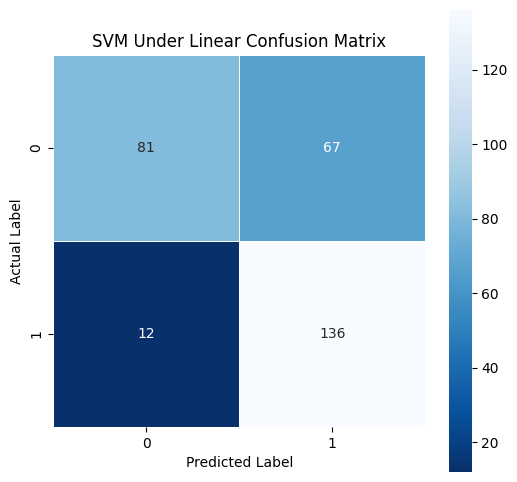

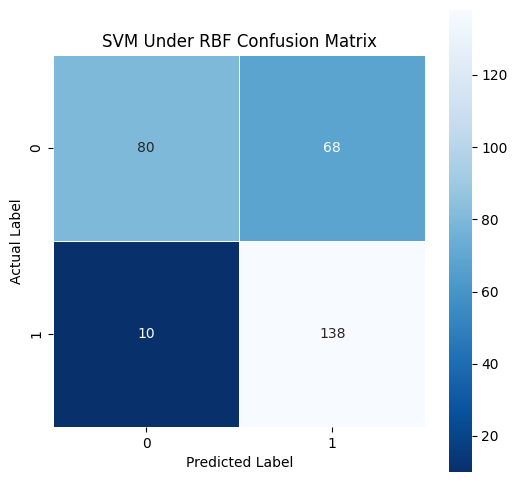

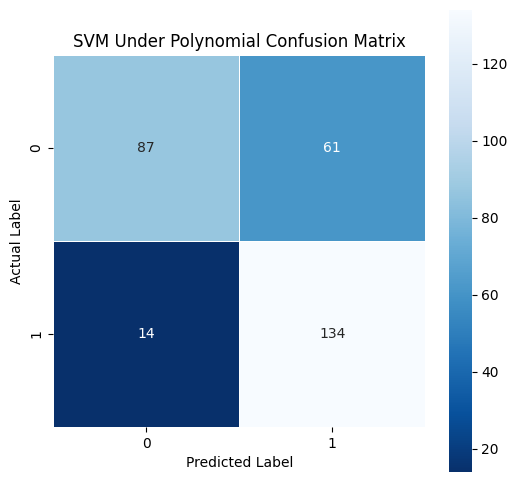

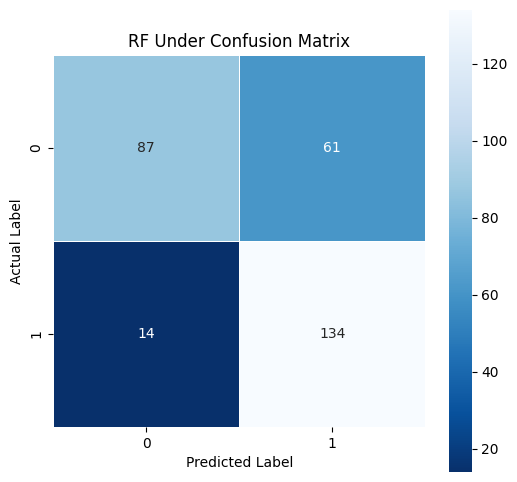

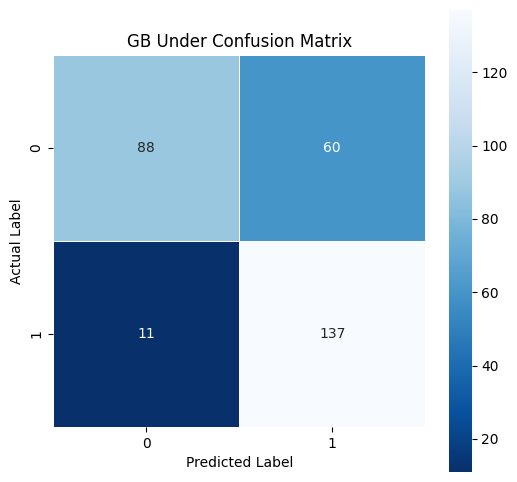

In [ ]:
# Confusion Matrix Undersampling Data
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, title):
  cm = confusion_matrix(y_true, y_pred)
  plt.figure(figsize=(6,6))
  sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square=True, cmap='Blues_r')
  plt.ylabel('Actual Label')
  plt.xlabel('Predicted Label')
  plt.title(title)

plot_confusion_matrix(y_test, svm_under_linear_pred, 'SVM Under Linear Confusion Matrix')
plt.show()

plot_confusion_matrix(y_test, svm_under_rbf_pred, 'SVM Under RBF Confusion Matrix')
plt.show()

plot_confusion_matrix(y_test, svm_under_poly_pred, 'SVM Under Polynomial Confusion Matrix')
plt.show()

plot_confusion_matrix(y_test, rf_under_pred, 'RF Under Confusion Matrix')
plt.show()

plot_confusion_matrix(y_test, gb_under_pred, 'GB Under Confusion Matrix')
plt.show()

Berdasarkan hasil evaluasi model menggunakan data undersampling, model SVM yang menghasilkan nilai akurasi tertinggi adalah SVM dengan kernel Polynomial yaitu sebesar 74,66%. Kemudian untuk nilai akurasi model Random Forest adalah 74,66% dan untuk model Gradient Boosting nilai akurasinya sebesar 76,01%.

**Kesimpulan Hasil Evaluasi**

Berdasarkan hasil modeling yang sudah dilakukan, model SVM yang terbaik adalah model SVM dengan kernel Polynomial menggunakan data oversampling dengan hasil akurasi sebesar 87,07%, precision sebesar 81,22%, recall sebesar 96,42%, dan F1 score sebesar 88,17%.  

Pada kasus deteksi klaim palsu asuransi kendaraan, lebih baik untuk mencari False Negatif yang paling kecil karena False Negatif terjadi saat model mengklasifikasikan suatu contoh sebagai negatif (bukan klaim palsu) padahal seharusnya positif (klaim palsu). False negatif berarti model gagal mengidentifikasi klaim yang sebenarnya palsu, yang berpotensi menyebabkan kerugian finansial bagi perusahaan asuransi.

Oleh karena itu, menurunkan tingkat false negatif menjadi prioritas ketika ingin memastikan bahwa model mampu mengidentifikasi sebanyak mungkin klaim palsu. Untuk mencari False Negatif yang kecil bisa ditentukan dengan mencari nilai recall yang tinggi, karena recall yang tinggi menunjukkan bahwa model memiliki kemampuan untuk menemukan sebagian besar klaim palsu yang sebenarnya.

Berdasarkan hasil evaluasi model yang sudah dilakukan, model yang memiliki nilai recall tertinggi adalah model SVM kernel RBF dengan data oversampling yaitu sebesar 96,55%.

**Hyperparameter Tuning**

Hyperparameter tuning adalah proses dalam pembelajaran mesin yang bertujuan untuk menemukan kombinasi terbaik dari nilai-nilai yang dapat diatur pada model. Hyperparameter Tuning yang digunakan pada penelitian ini adalah Grid Search yaitu proses mencari kombinasi parameter yang paling baik dengan menguji setiap kombinasi yang mungkin dari nilai parameter yang telah ditentukan sebelumnya. Hyperparameter Tuning akan dilakukan pada data yang sudah di undersampling.

**Hyperparameter Tuning untuk Model Support Vector Machines Undersampling**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Inisialisasi model SVM dan set parameter yang ingin dieksplorasi
svm_model = SVC()  # Model SVM
grid_parameters = {
    'C': [0.1, 1, 2, 3, 4, 5],  # Range nilai untuk parameter C (regularization parameter)
    'gamma': ['scale', 'auto', 0.1, 0.01, 0.001],  # Berbagai nilai untuk parameter gamma
    'kernel': ['rbf', 'linear', 'poly']  # Jenis kernel yang akan diuji
}

# Pengaturan GridSearchCV
grid_search = GridSearchCV(estimator=svm_model, param_grid=grid_parameters, scoring='recall', cv=5)

# Melatih model menggunakan data x_under dan y_under untuk mencari parameter terbaik
grid_search.fit(X_under, y_under)

# Menampilkan parameter terbaik yang ditemukan oleh GridSearchCV
print("Parameter terbaik:", grid_search.best_params_)

Parameter terbaik: {'C': 4, 'gamma': 0.1, 'kernel': 'poly'}


In [ ]:
# Inisialisasi model SVM dengan parameter terbaik dari hasil GridSearchCV
best_params = grid_search.best_params_
svm_model_best = SVC(C=best_params['C'], gamma=best_params['gamma'], kernel=best_params['kernel'])

# Melatih model dengan data yang sesuai (misalnya, data yang telah diundersampling)
svm_model_best.fit(X_under, y_under)

SVC(C=4, gamma=0.1, kernel='poly')

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Prediksi menggunakan model yang sudah dilatih
predictions = svm_model_best.predict(X_test)

# Matriks konfusi
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:\n", conf_matrix)

# Akurasi
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Presisi
precision = precision_score(y_test, predictions)
print("Precision:", precision)

# Recall
recall = recall_score(y_test, predictions)
print("Recall:", recall)

# F1-Score
f1 = f1_score(y_test, predictions)
print("F1 Score:", f1)

Confusion Matrix:
 [[ 84  64]
 [  8 140]]
Accuracy: 0.7567567567567568
Precision: 0.6862745098039216
Recall: 0.9459459459459459
F1 Score: 0.7954545454545455


Setelah dilakukan hyperparameter tuning, kombinasi parameter terbaik untuk model SVM adalah {'C': 4, 'gamma': 0.1, 'kernel': 'poly'}. Diperoleh nilai akurasi sebesar 75,68%, presicion sebesar 68,63%, recall sebesar 94,59%, dan F1 score sebesar 79,55%.

**Hyperparameter Tuning untuk Model Random Forest Undersampling**

In [ ]:
# Inisialisasi model Random Forest dan set parameter yang ingin dieksplorasi
random_forest_clf = RandomForestClassifier()  # Model Random Forest
grid_parameters = {
    'criterion': ['gini', 'entropy'],  # Kriteria untuk pemilihan fitur terbaik
    'max_features': ['sqrt', 'log2'],  # Jumlah fitur yang harus dipertimbangkan
    'max_depth': np.arange(2, 21),  # Maksimal kedalaman tree
    'n_estimators': [30]  # Jumlah trees dalam random forest
}

# Pengaturan GridSearchCV
grid_search = GridSearchCV(estimator=random_forest_clf, param_grid=grid_parameters, cv=5, scoring='accuracy')

# Melatih model menggunakan data x_under dan y_under untuk mencari parameter terbaik
grid_search.fit(X_under, y_under)

# Menampilkan parameter terbaik yang ditemukan oleh GridSearchCV
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 14,
 'max_features': 'sqrt',
 'n_estimators': 30}

In [ ]:
# Inisialisasi model Random Forest dengan parameter terbaik dari hasil GridSearchCV
best_params = grid_search.best_params_
random_forest_best = RandomForestClassifier(criterion=best_params['criterion'],
                                            max_features=best_params['max_features'],
                                            max_depth=best_params['max_depth'],
                                            n_estimators=best_params['n_estimators'])

# Melatih model dengan data yang sesuai (misalnya, data yang telah diundersampling)
random_forest_best.fit(X_under, y_under)

RandomForestClassifier(max_depth=14, n_estimators=30)

In [ ]:
# Prediksi menggunakan model yang sudah dilatih
predictions = random_forest_best.predict(X_test)

# Matriks konfusi
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:\n", conf_matrix)

# Akurasi
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Presisi
precision = precision_score(y_test, predictions)
print("Precision:", precision)

# Recall
recall = recall_score(y_test, predictions)
print("Recall:", recall)

# F1-Score
f1 = f1_score(y_test, predictions)
print("F1 Score:", f1)

Confusion Matrix:
 [[147   1]
 [  0 148]]
Accuracy: 0.9966216216216216
Precision: 0.9932885906040269
Recall: 1.0
F1 Score: 0.9966329966329966


Setelah dilakukan hyperparameter tuning, kombinasi parameter terbaik untuk model Random Forest adalah {'criterion': 'gini', 'max_depth': 14, 'max_features': 'sqrt', 'n_estimators': 30}. Diperoleh nilai akurasi sebesar 99,66%, precision sebesar 99,33%, recall sebesar 100%, dan F1 score sebesar 99,66%.

**Hyperparameter Tuning untuk Model Gradient Boosting Undersampling**

In [ ]:
# Inisialisasi model Gradient Boosting
gradient_boosting = GradientBoostingClassifier()

# Daftar parameter yang akan dijelajahi
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.01, 0.001]
}

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(estimator=gradient_boosting, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Melakukan GridSearchCV pada data latih
grid_search.fit(X_under, y_under)

# Menampilkan parameter terbaik yang ditemukan oleh GridSearchCV
grid_search.best_params_

{'learning_rate': 0.01, 'n_estimators': 200}

In [ ]:
# Inisialisasi model Gradient Boosting dengan parameter terbaik dari hasil GridSearchCV
best_params = grid_search.best_params_
gradient_boosting_best = GradientBoostingClassifier(n_estimators=best_params['n_estimators'],
                                                    learning_rate=best_params['learning_rate'])

# Melatih model dengan data yang sesuai
gradient_boosting_best.fit(X_under, y_under)

GradientBoostingClassifier(learning_rate=0.01, n_estimators=200)

In [ ]:
# Prediksi menggunakan model yang sudah dilatih
predictions = gradient_boosting_best.predict(X_test)

# Matriks konfusi
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:\n", conf_matrix)

# Akurasi
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Presisi
precision = precision_score(y_test, predictions)
print("Precision:", precision)

# Recall
recall = recall_score(y_test, predictions)
print("Recall:", recall)

# F1-Score
f1 = f1_score(y_test, predictions)
print("F1 Score:", f1)

Confusion Matrix:
 [[ 81  67]
 [  8 140]]
Accuracy: 0.7466216216216216
Precision: 0.6763285024154589
Recall: 0.9459459459459459
F1 Score: 0.7887323943661971


Setelah dilakukan hyperparameter tuning, kombinasi parameter terbaik untuk model Gradient Boosting adalah {'learning_rate': 0.01, 'n_estimators': 200}. Diperoleh nilai akurasi sebesar 74,66%, precision sebesar 67,63%, recall sebesar 94,59% dan F1 score sebesar 78,87%.

**Feature Importance**

In [ ]:
# Feature Importance
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
Fault,0.113
BasePolicy,0.086
Age,0.070
PolicyType,0.063
RepNumber,0.061
Month,0.054
MonthClaimed,0.051
Make,0.047
DayOfWeek,0.047


<Axes: xlabel='feature'>

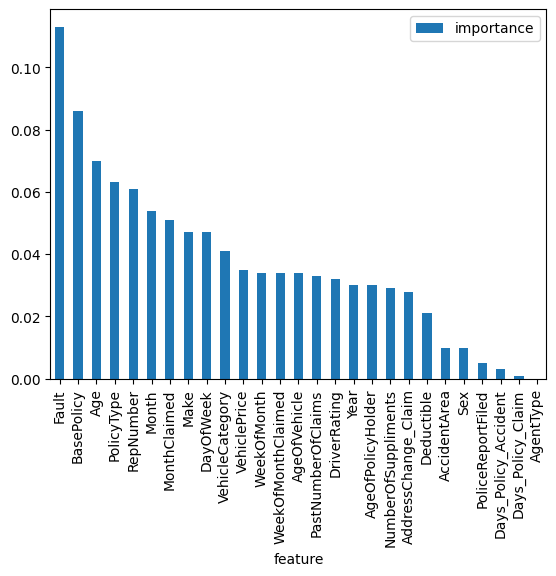

In [ ]:
importances.plot.bar()

Berdasarkan hasil tersebut, feature yang paling importance atau berpengaruh terhadap prediksi klaim palsu asuransi kendaraan adalah Fault (Orang yang bertanggung jawab atas kecelakaan yaitu antara pemegang polis atau orang ketiga), BasePolicy (Jenis perlindungan asuransinya yaitu All Perils, Collision, dan Liability), dan Age (Usia orang yang mengajukan klaim).

### **Kesimpulan**

*   Model SVM sudah bisa memprediksi klaim palsu dengan cukup baik.
*   Model SVM dengan akurasi tertinggi adalah semua model SVM yang menggunakan Imbalance Data yaitu sebesar 94%. Namun model tersebut kurang baik karena untuk nilai precision, recall, dan F1-score nya 0 yang menandakan bahwa model hanya memprediksi klaim tidak palsu saja, untuk klaim palsu nya tidak terdeteksi. Hal tersebut bisa terjadi karena akibat dari data yang tidak seimbang antara klaim palsu dan klaim tidak palsu.
*   Teknik Oversampling dan Undersampling bisa menjadi solusi untuk data yang tidak seimbang.
*   Untuk model yang menggunakan data oversampling, model SVM yang paling baik adalah model SVM dengan kernel Polynomial dengan nilai akurasi sebesar 87,07%, precision sebesar 81,22%, recall sebesar 96,42%, dan F1 score sebesar 88,17%.
*   Untuk model yang menggunakan data undersampling, model SVM yang paling baik adalah model SVM dengan kernel Polynomial dengan nilai akurasi sebesar 74,66%, precision sebesar 68,72%, recall sebesar 90,54%, dan F1 score sebesar 78,13%.
*   Pada kasus deteksi klaim palsu asuransi kendaraan, lebih baik untuk mencari False Negatif yang paling kecil karena False Negatif terjadi saat model mengklasifikasikan suatu contoh sebagai negatif (bukan klaim palsu) padahal seharusnya positif (klaim palsu). Oleh karena itu, lebih baik mencari model dengan nilai recall yang besar.
*   Model dengan nilai recall terbesar adalah model SVM kernel RBF dengan data oversampling yaitu sebesar 96,55%
*   Kemudian karena data undersampling memiliki nilai yang cukup kecil, maka coba dilakukan hyperparameter tuning untuk mencari kombinsai parameter terbaik.
*   Setelah dilakukan hyperparameter tuning dengan GridSearchCV, kombinasi parameter terbaik untuk model SVM adalah {'C': 4, 'gamma': 0.1, 'kernel': 'poly'} yang menghasilkan nilai akurasi sebesar 75,68%, presicion sebesar 68,63%, recall sebesar 94,59%, dan F1 score sebesar 79,55%.
*   Kemudian untuk keseluruhan model, model yang sudah bisa memprediksi klaim asuransi palsu dengan benar adalah Random Forest dengan data undersampling setelah dilakukan hyperparameter tuning yaitu diperoleh nilai akurasi sebesar 99,66%, precision sebesar 99,33%, recall sebesar 100%, dan F1 score sebesar 99,66%.
*   Feature yang paling berpengaruh terhadap prediksi klaim palsu asuransi kendaraan adalah Fault (Orang yang bertanggung jawab atas kecelakaan yaitu antara pemegang polis atau orang ketiga), BasePolicy (Jenis perlindungan asuransinya yaitu All Perils, Collision, dan Liability), dan Age (Usia orang yang mengajukan klaim).